In [1]:
## Setting up Workbook to run 

import sys, os

import configparser
import subprocess
import warnings
import pprint

import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
random.seed(540)

path_to_data = os.path.join('OnlineNewsPopularity.csv')

df = pd.read_csv(path_to_data)

df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

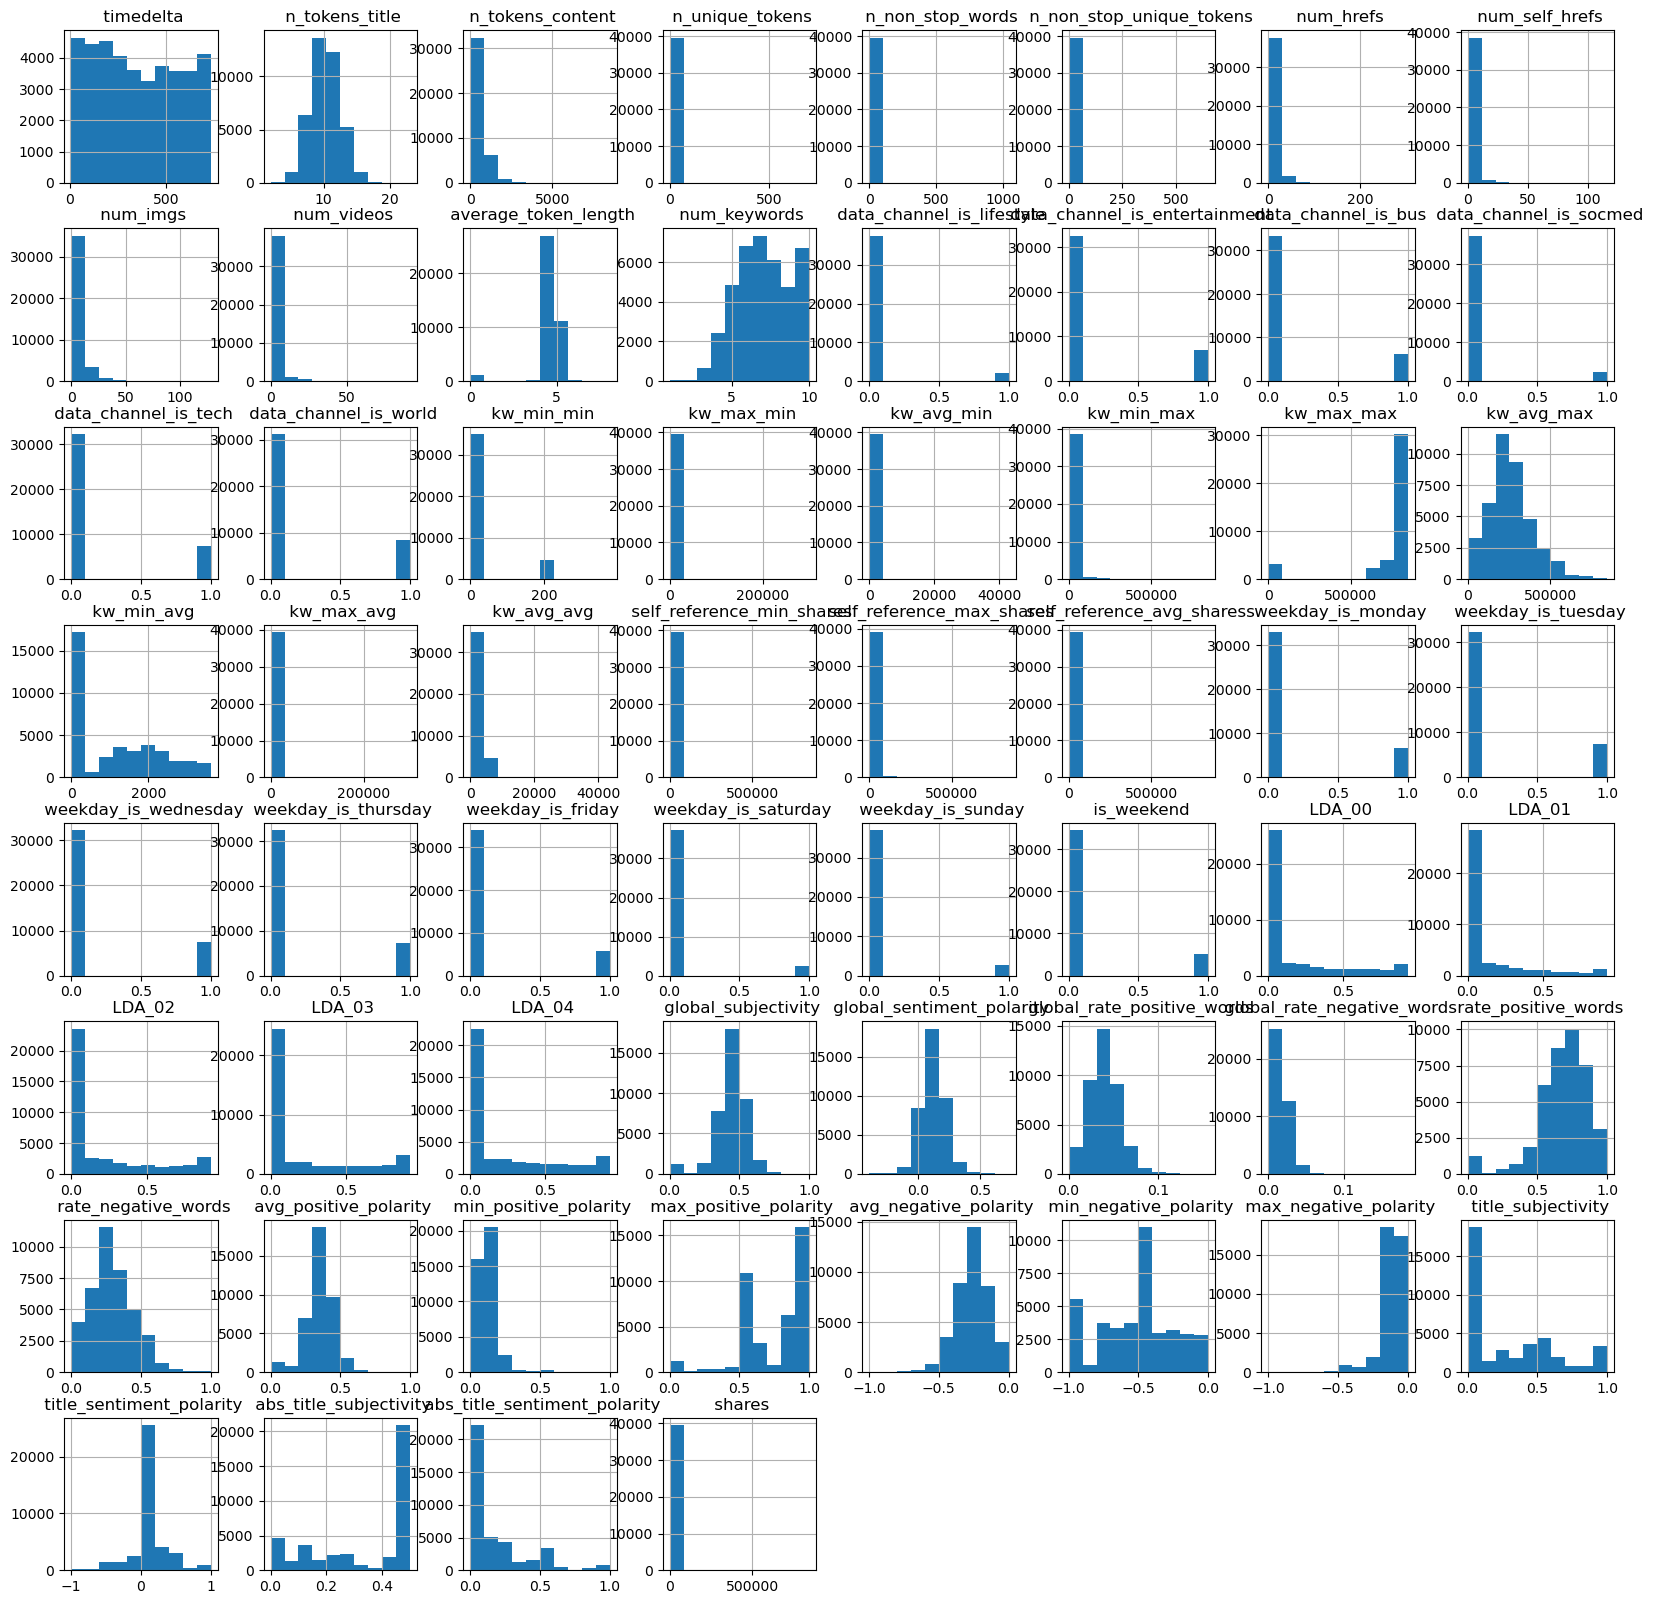

In [5]:
df.hist(figsize=(20,20))
plt.show()

In [6]:
df.columns=df.columns.str.replace(" ","")

In [7]:
df = df.drop('url',axis=1)

In [8]:
warnings.filterwarnings('ignore')

<AxesSubplot:>

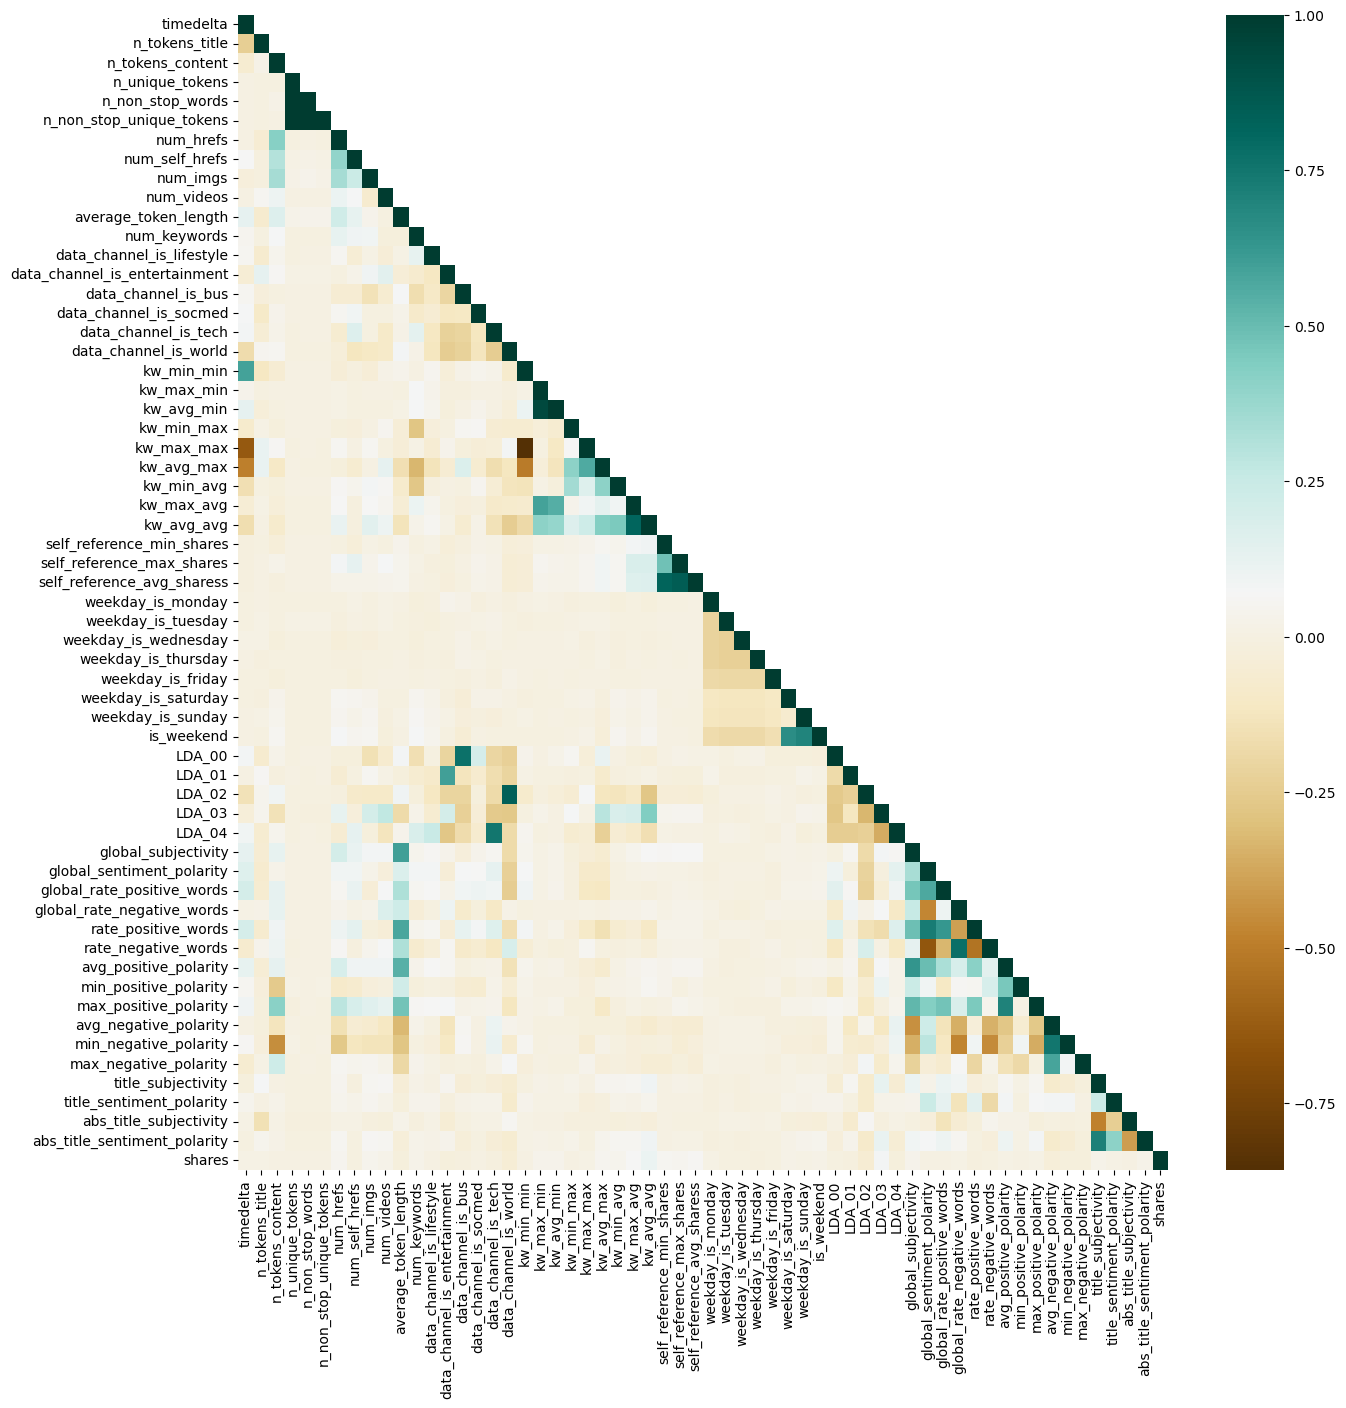

In [9]:
cor=df.corr()
#ns.heatmap(cor)
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool_))
sns.heatmap(df_lt,cmap='BrBG')

In [10]:
num_of_nowords=df[df['n_tokens_content']==0].index
print('number of news with no words',num_of_nowords.size)

number of news with no words 1181


In [11]:
#shortening weekday and channel column header titles
df.columns = df.columns.str.replace('weekday_is_', '')
df.columns = df.columns.str.replace('data_channel_is_', '')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timedelta                     39644 non-null  float64
 1   n_tokens_title                39644 non-null  float64
 2   n_tokens_content              39644 non-null  float64
 3   n_unique_tokens               39644 non-null  float64
 4   n_non_stop_words              39644 non-null  float64
 5   n_non_stop_unique_tokens      39644 non-null  float64
 6   num_hrefs                     39644 non-null  float64
 7   num_self_hrefs                39644 non-null  float64
 8   num_imgs                      39644 non-null  float64
 9   num_videos                    39644 non-null  float64
 10  average_token_length          39644 non-null  float64
 11  num_keywords                  39644 non-null  float64
 12  lifestyle                     39644 non-null  float64
 13  e

In [13]:
df = df[df['n_tokens_content'] != 0]

In [14]:
#dropping columns that are not valuable for the analysis
df = df.drop('timedelta',axis=1)
df= df.drop(['n_non_stop_unique_tokens','n_non_stop_words','kw_avg_min'],axis=1)

In [15]:
df['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [16]:
#determine the appropriate threshold for number of shares for feature engineering.
df['shares'].median()

1400.0

In [17]:
df['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

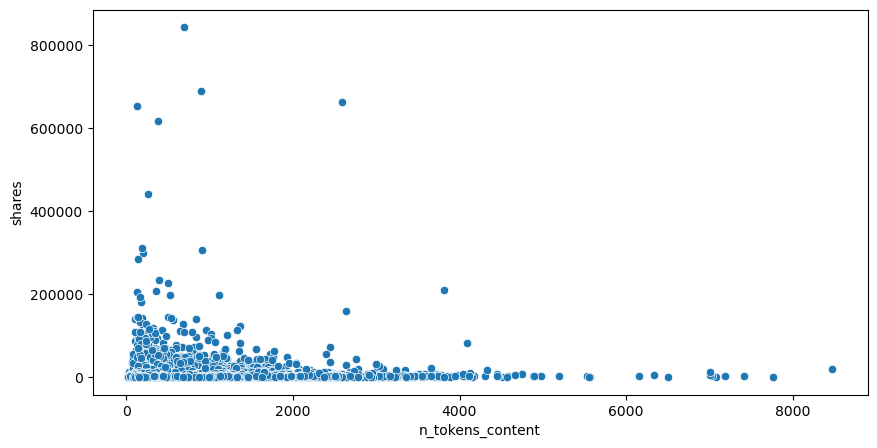

In [18]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=df)

In [19]:
a,b = df['shares'].mean(),df['shares'].median()

In [20]:
weekday = df.columns.values[26:33]
weekday

array(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday'], dtype=object)

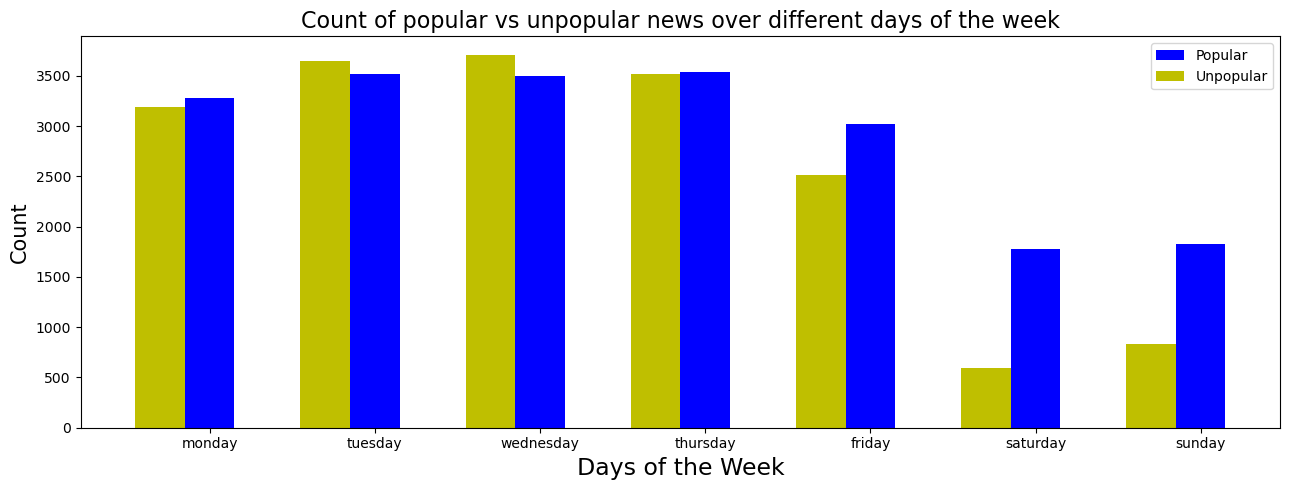

In [21]:
#Visual of popular vs. unpopular news across the week
Unpop=df[df['shares']<b]
Pop=df[df['shares']>=b]
Unpop_day = Unpop[weekday].sum().values
Pop_day = Pop[weekday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular vs unpopular news over different days of the week", fontsize = 16)

plt.bar(np.arange(len(weekday)),Pop_day,width=0.3,align='center',color='b',label='Popular')
plt.bar(np.arange(len(weekday))-0.3,Unpop_day,width=0.3,align='center',color='y',label='Unpopular')

plt.xticks(np.arange(len(weekday)),weekday)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Days of the Week',fontsize=17)


plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [22]:
channel=df.columns[9:15]
channel

Index(['lifestyle', 'entertainment', 'bus', 'socmed', 'tech', 'world'], dtype='object')

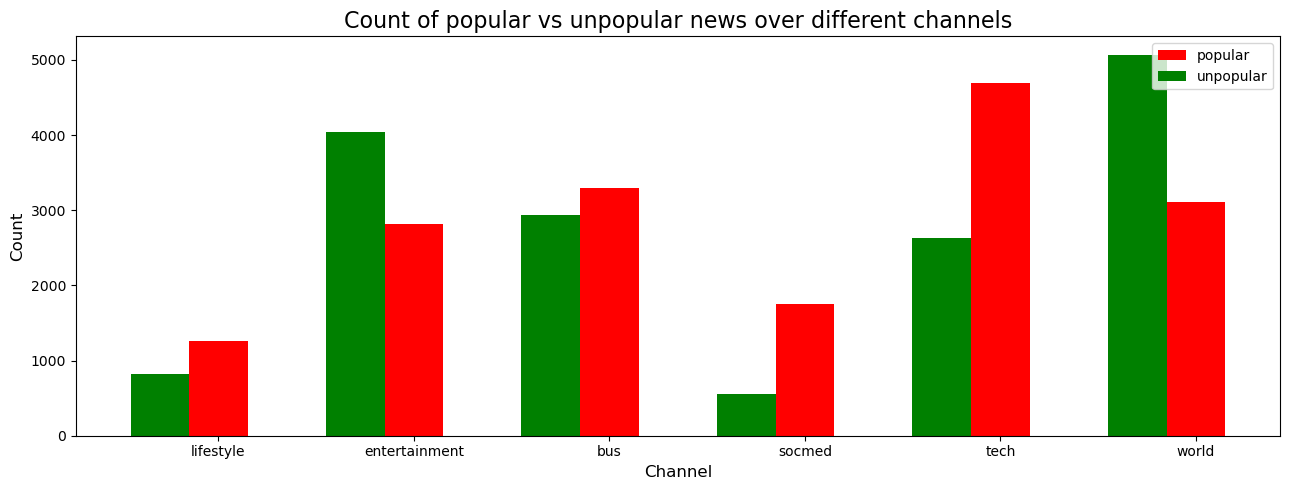

In [23]:
#count of popular vs. unpopular news over different channels
Unpop2=df[df['shares']<b]
Pop2=df[df['shares']>=b]
Unpop_day2 = Unpop2[channel].sum().values
Pop_day2 = Pop2[channel].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular vs unpopular news over different channels", fontsize = 16)
plt.bar(np.arange(len(channel)), Pop_day2, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(channel)) - 0.3, Unpop_day2, width = 0.3, align = "center", color = 'g', \
          label = "unpopular")
plt.xticks(np.arange(len(channel)),channel)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Channel", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

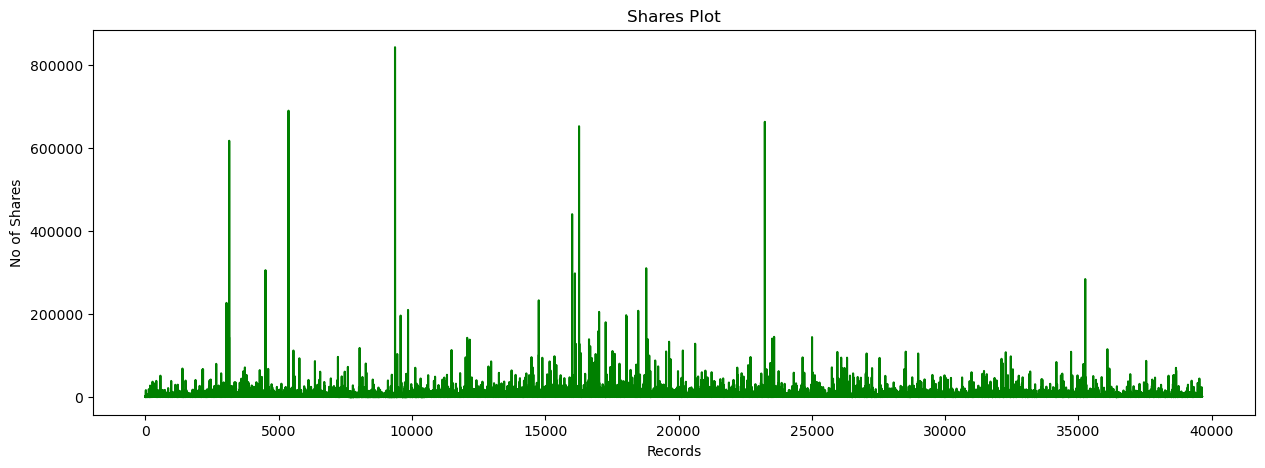

<AxesSubplot:>

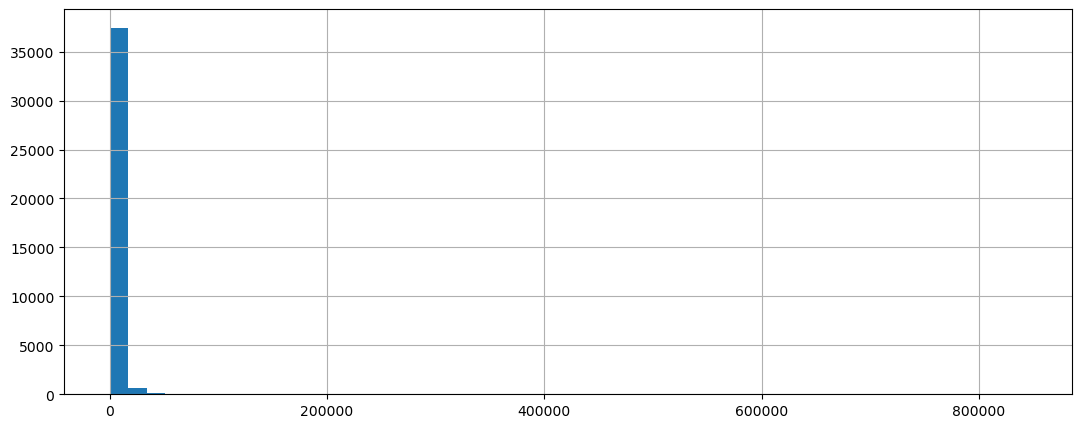

In [24]:
plt.figure(figsize=(15,5))
plt.plot(df.shares,color='g')
plt.xlabel('Records')
plt.ylabel('No of Shares')
plt.title('Shares Plot')
plt.show()

plt.figure(figsize=(13,5))
df.shares.hist(bins=50)

In [25]:
df.shape

(38463, 57)

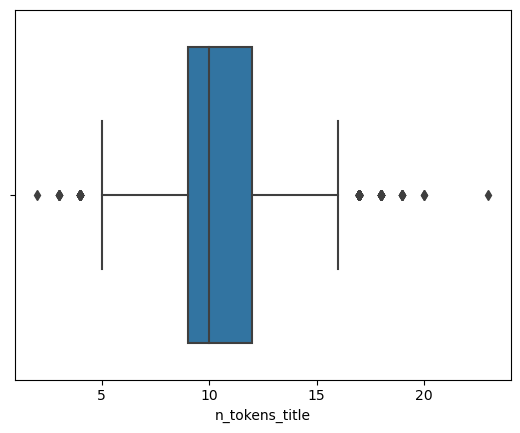

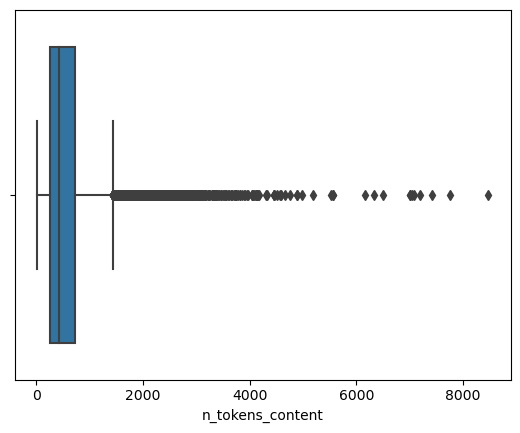

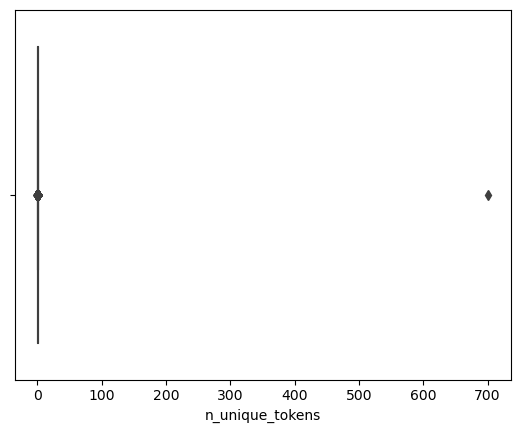

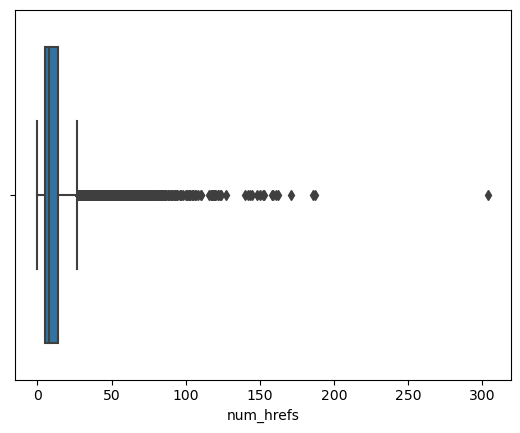

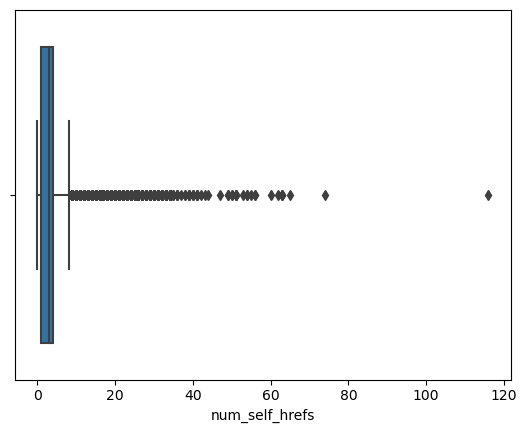

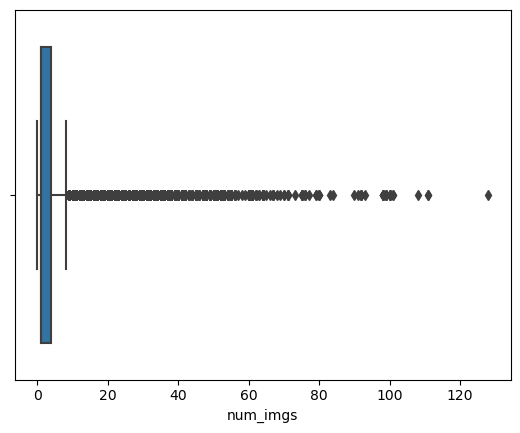

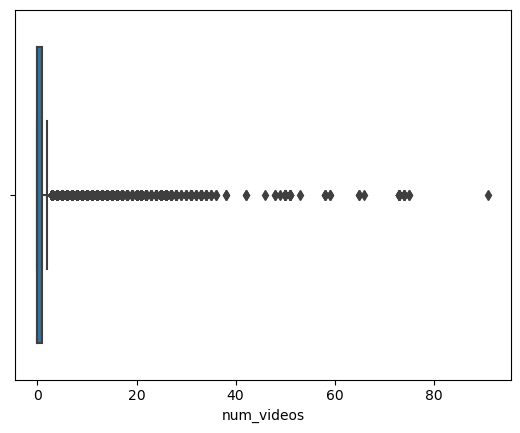

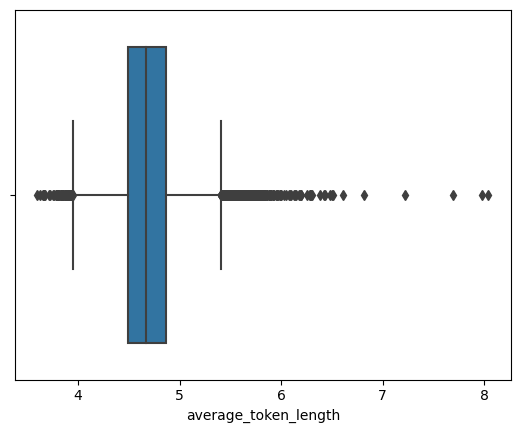

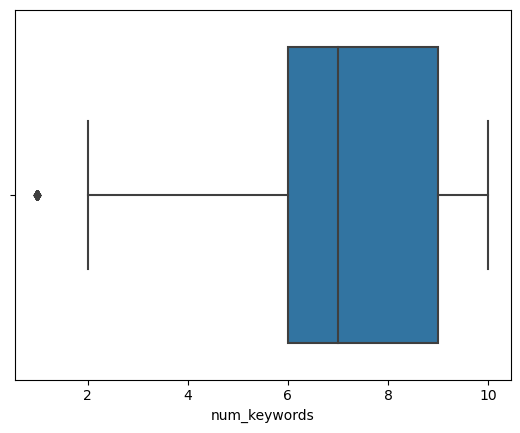

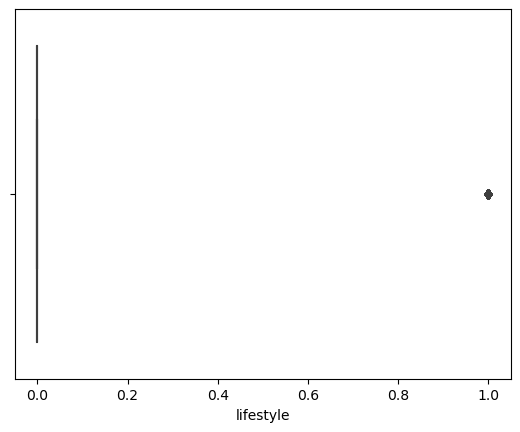

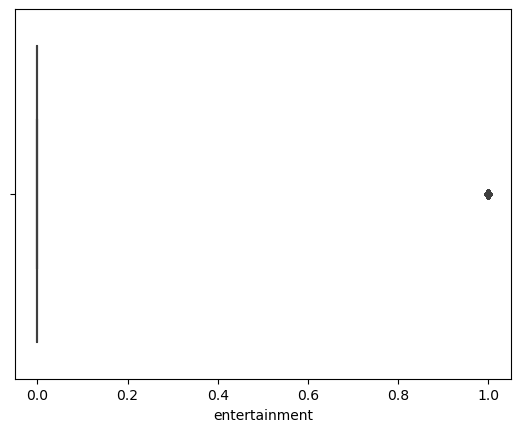

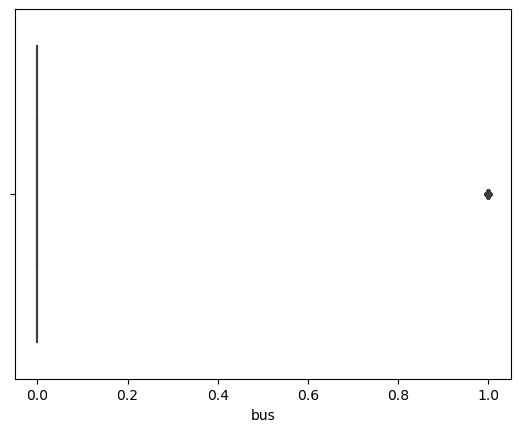

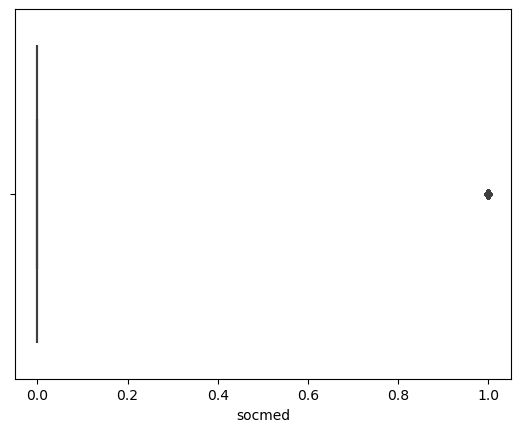

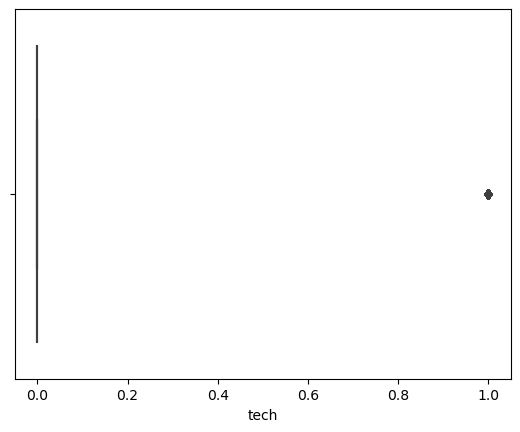

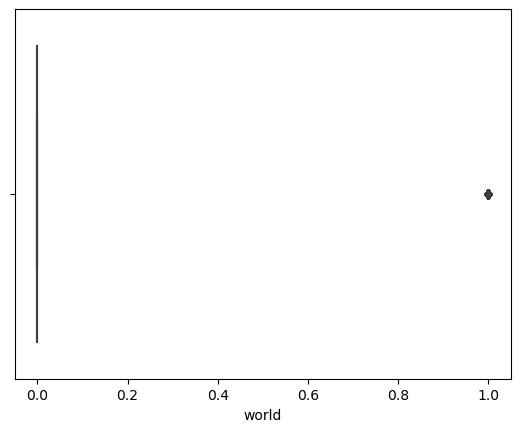

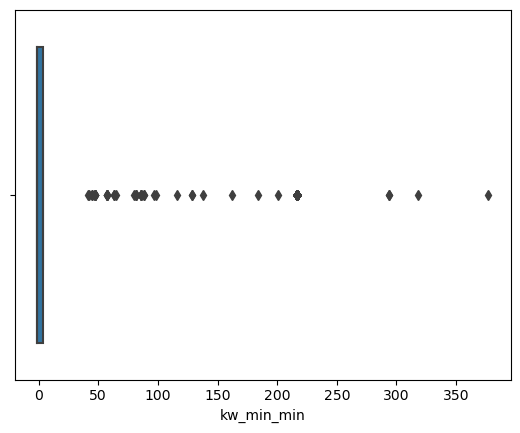

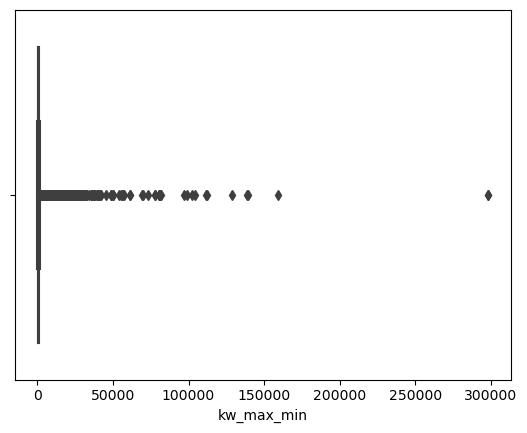

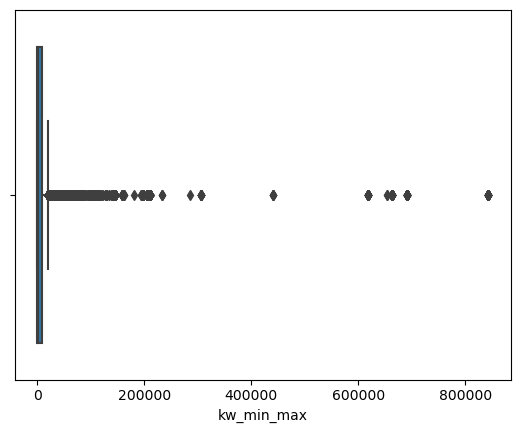

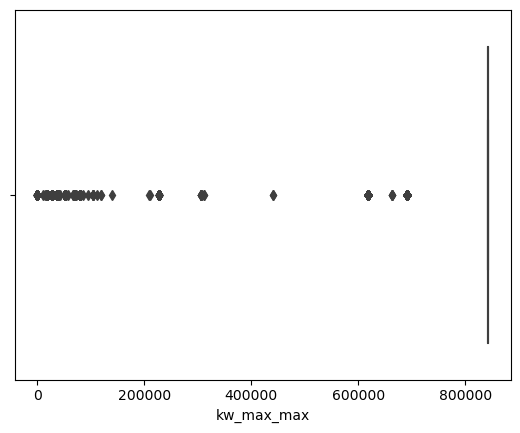

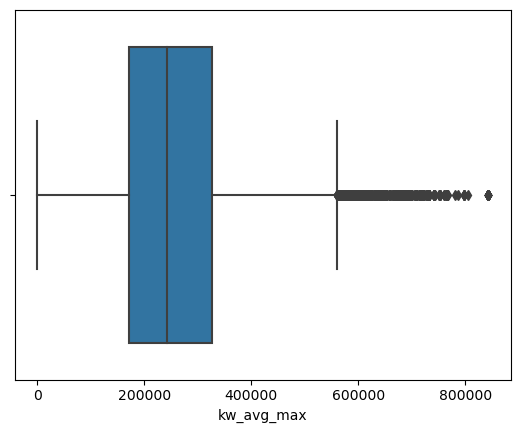

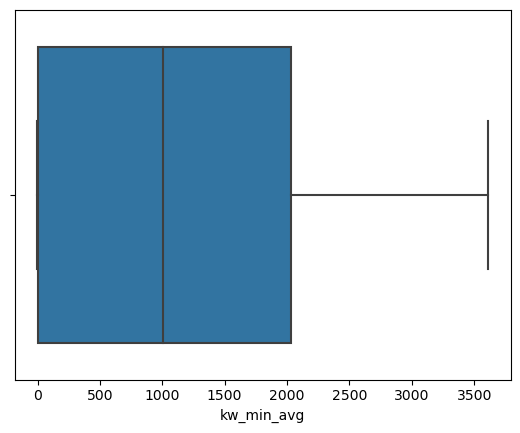

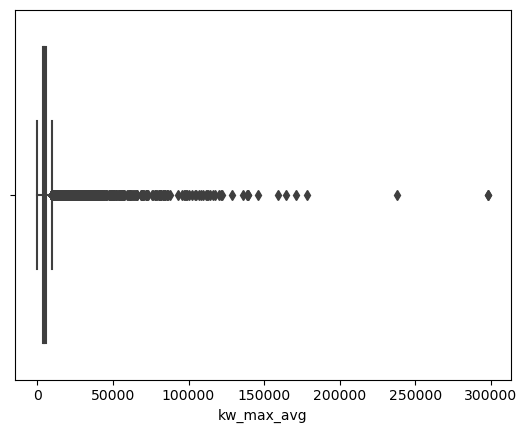

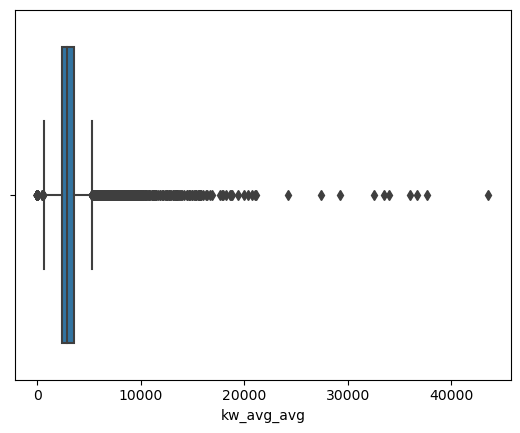

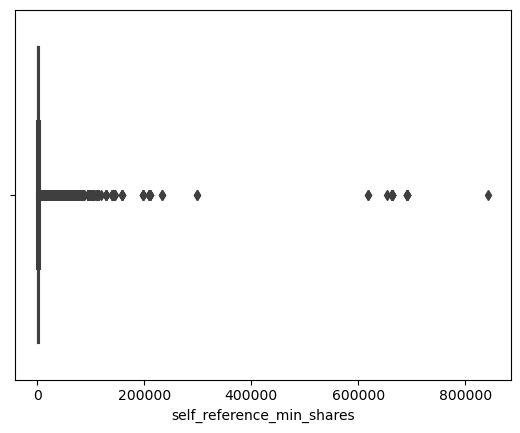

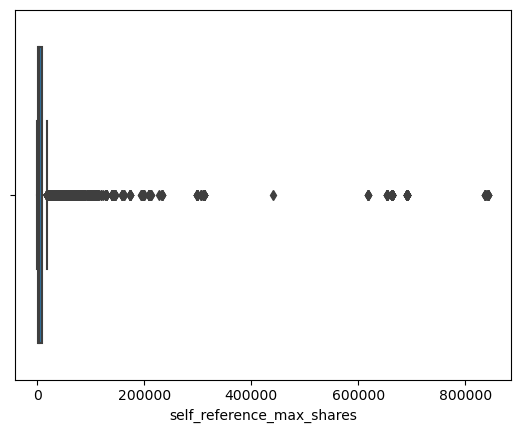

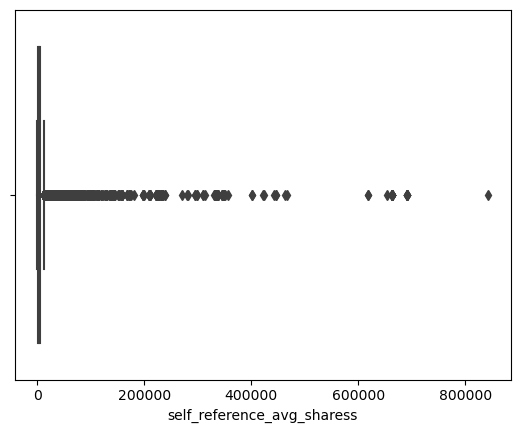

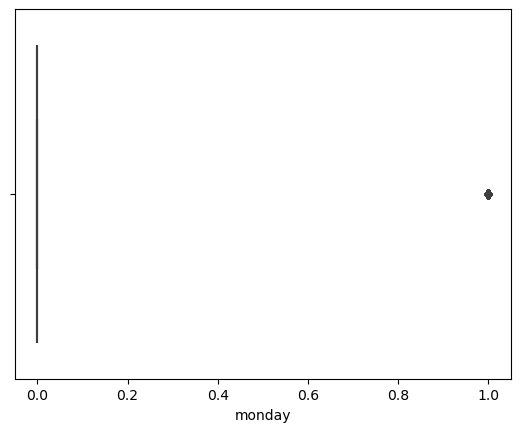

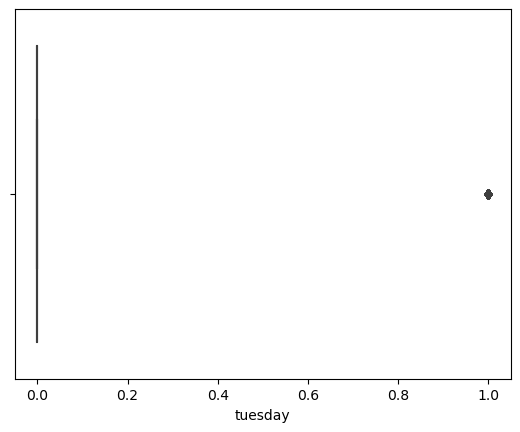

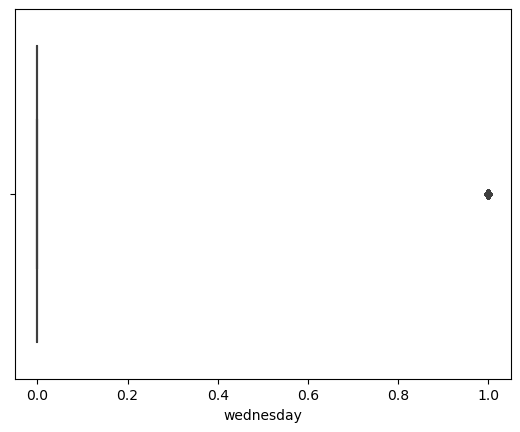

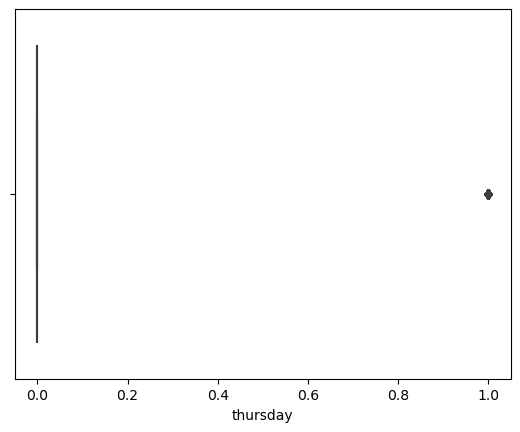

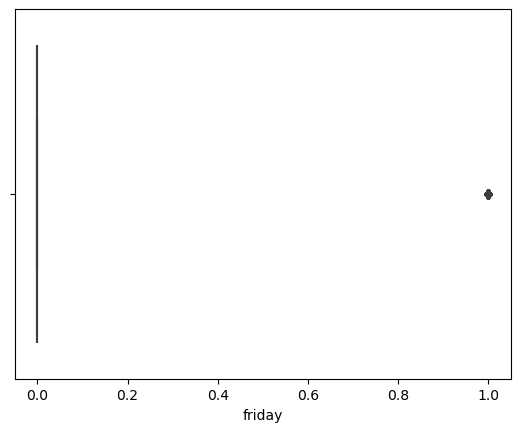

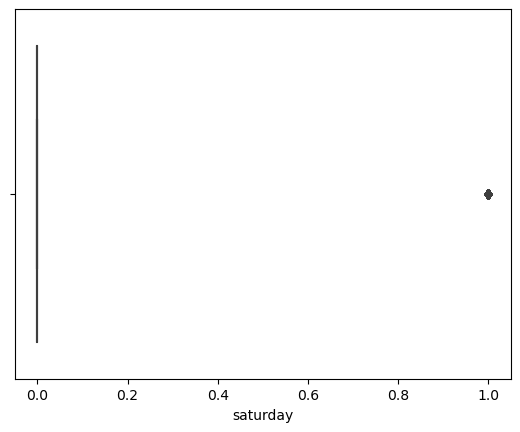

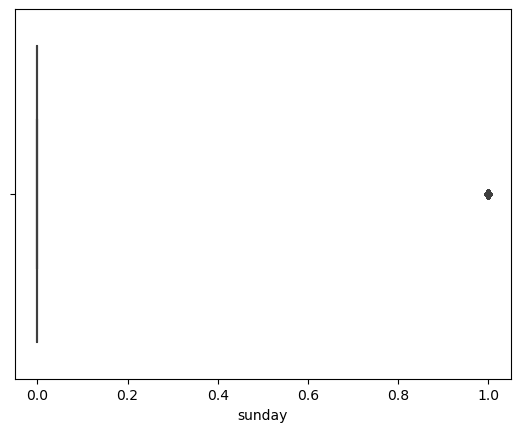

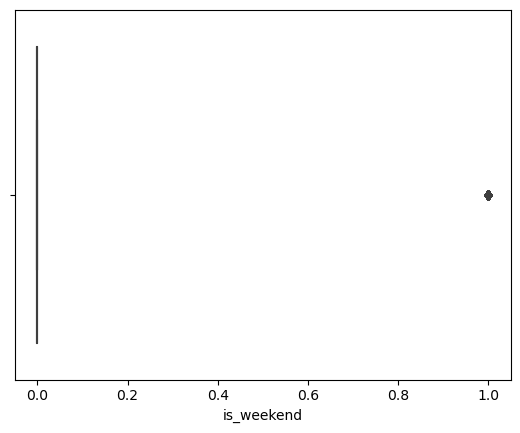

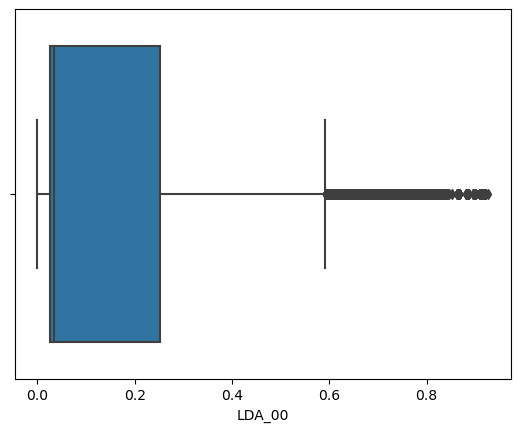

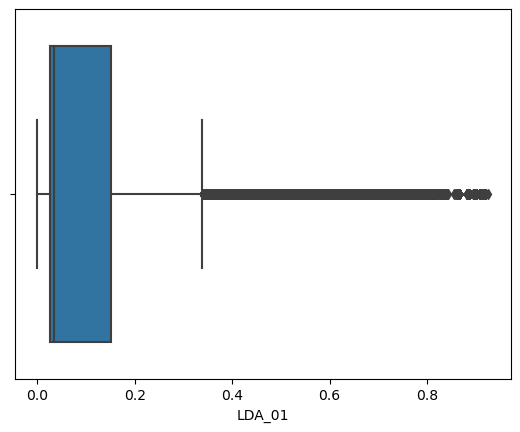

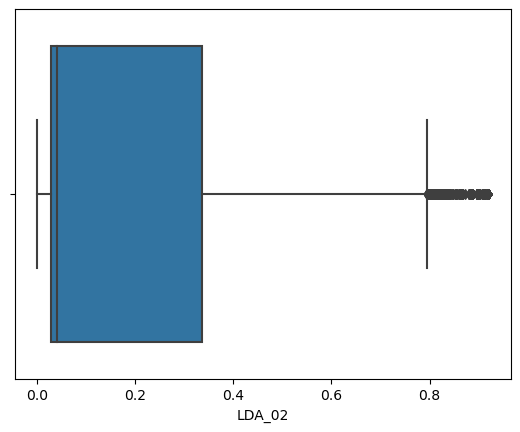

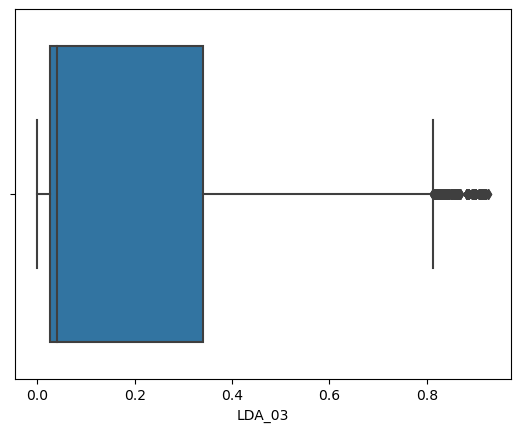

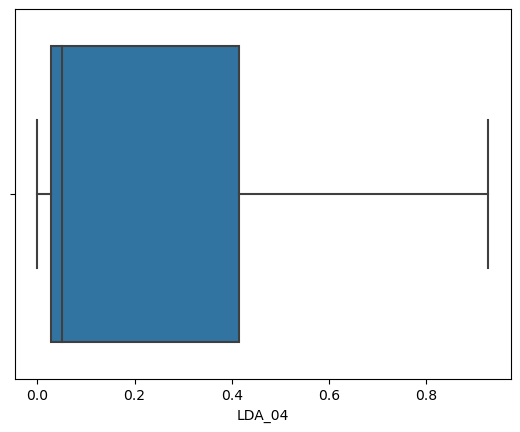

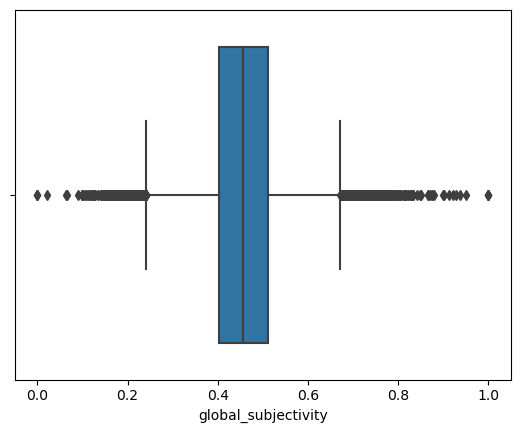

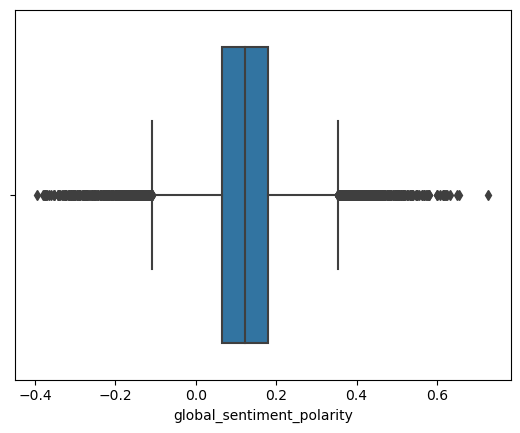

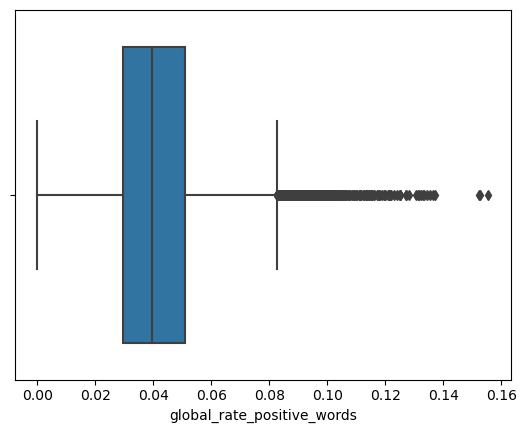

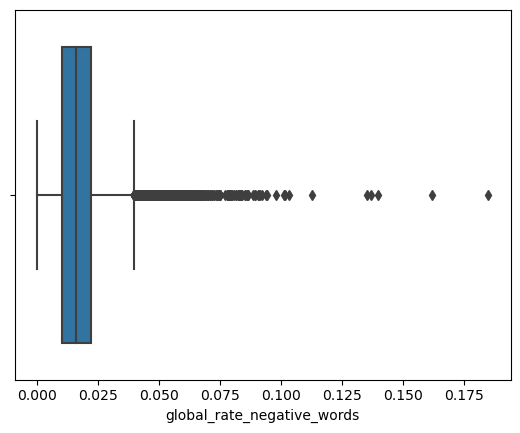

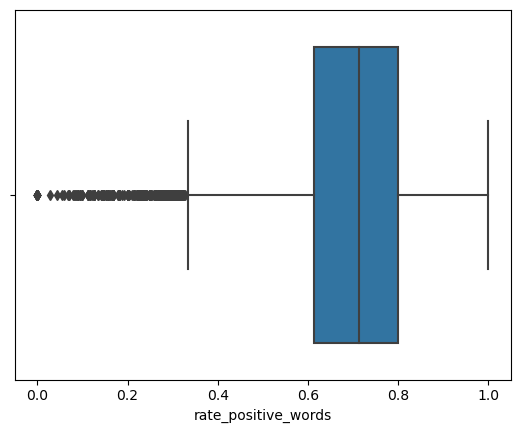

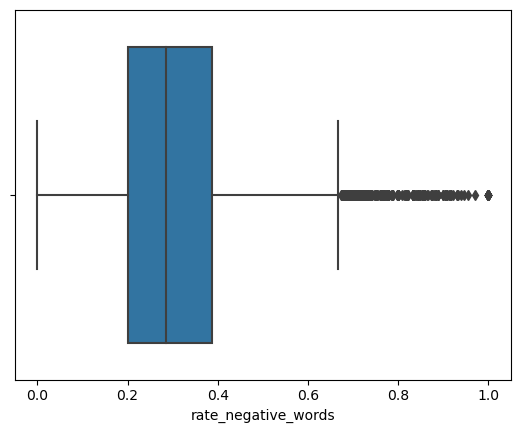

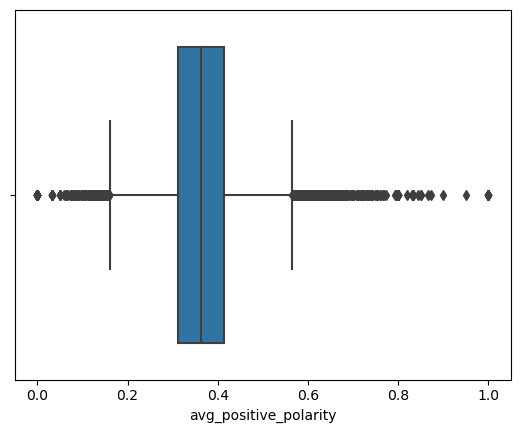

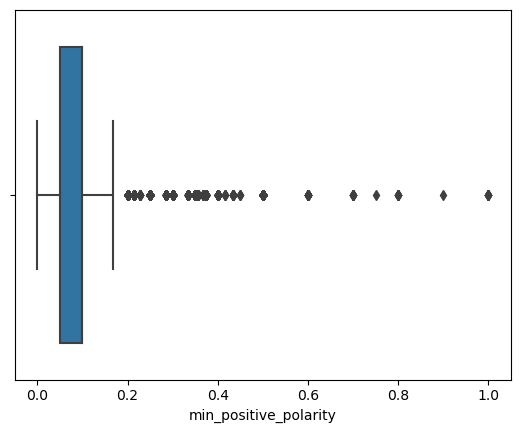

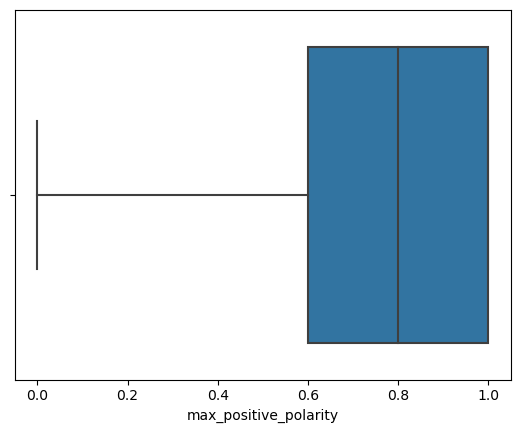

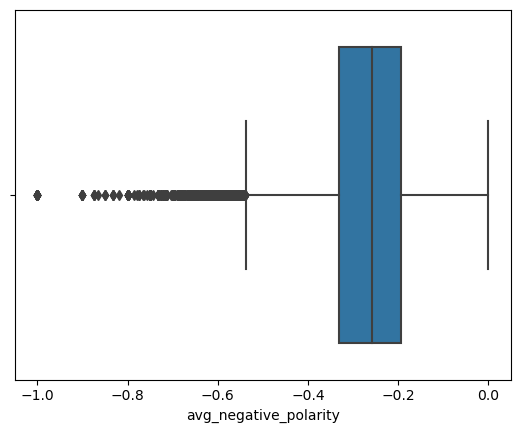

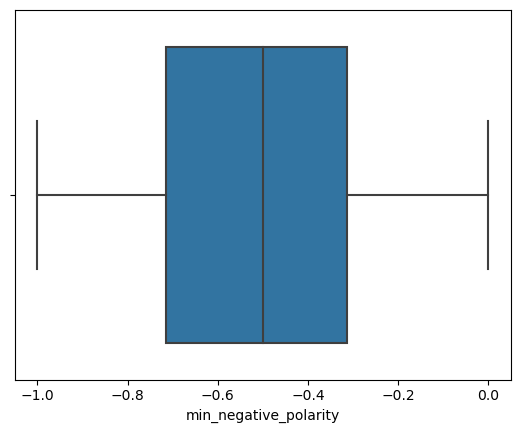

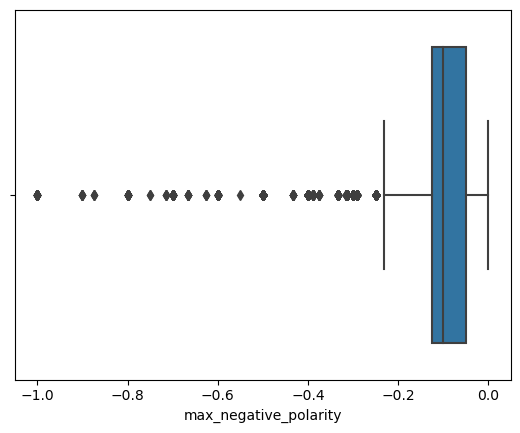

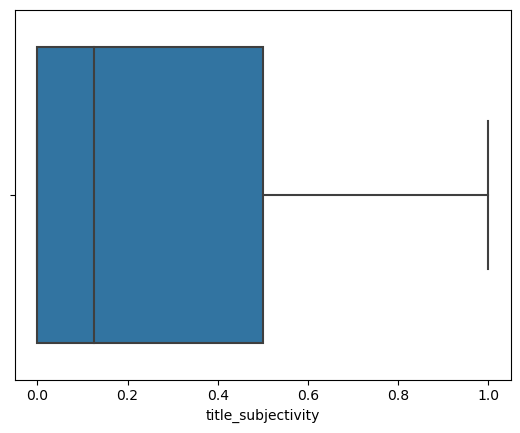

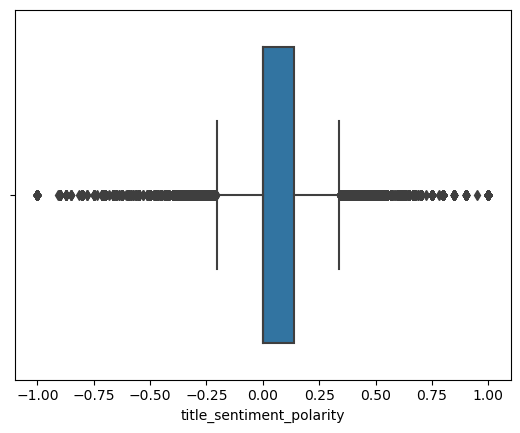

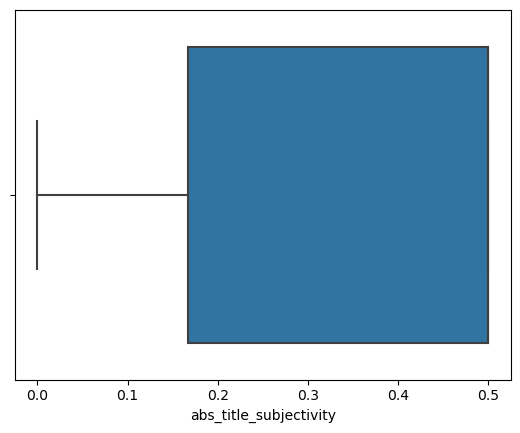

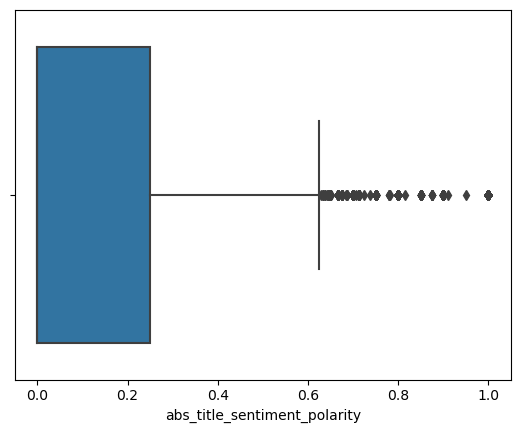

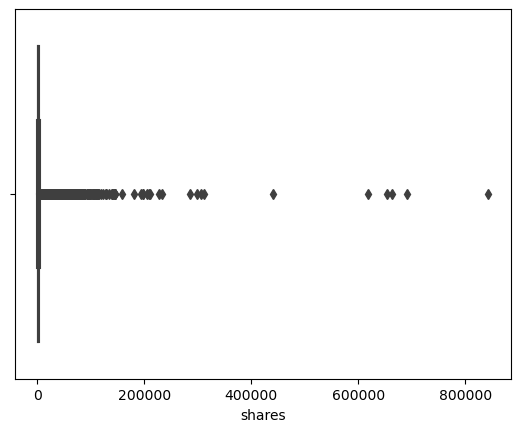

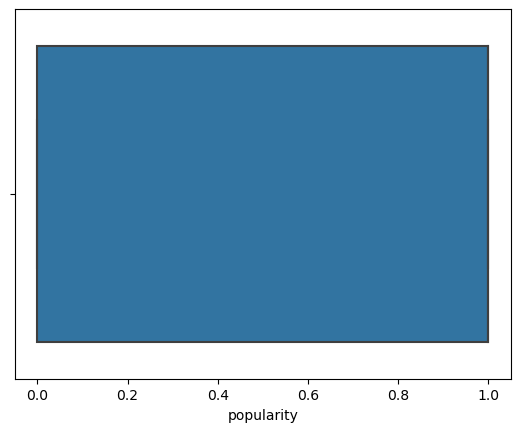

In [26]:
#Outliers
num_cols = df.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df[num_cols[i]])
    plt.show()

In [27]:
for column in num_cols:    
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 155
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1875
-446.0
1434.0
470.0
Number of outliers in "n_unique_tokens" : 490
0.27688172230725006
0.8116487408852499
0.13369175464449995
Number of outliers in "num_hrefs" : 2636
-8.5
27.5
9.0
Number of outliers in "num_self_hrefs" : 2090
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 7466
-3.5
8.5
3.0
Number of outliers in "num_videos" : 2939
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 552
3.9477737410249993
5.410377035785
0.36565082369000024
Number of outliers in "num_keywords" : 50
1.5
13.5
3.0
Number of outliers in "lifestyle" : 2077
0.0
0.0
0.0
Number of outliers in "entertainment" : 6856
0.0
0.0
0.0
Number of outliers in "bus" : 6235
0.0
0.0
0.0
Number of outliers in "socmed" : 2311
0.0
0.0
0.0
Number of outliers in "tech" : 7325
0.0
0.0
0.0
Number of outliers in "world" : 8168
0.0
0.0
0.0
Number of outliers in "kw_min_min" : 4638
-8.5
11.5
5.0
Number of outliers in "kw_m

In [28]:
#scaling the dataset df2_num contains the numerical features while df2_cat contains the categorical features.

df2_num=df.drop(["monday","tuesday","wednesday","thursday",
                  "friday","saturday","sunday","is_weekend",                  
                  "lifestyle","entertainment","bus",
                  "socmed","tech","world"],axis=1)

df2_cat=df[["monday","tuesday","wednesday","thursday",
             "friday","saturday","sunday","is_weekend",            
             "lifestyle","entertainment","bus",
                  "socmed","tech","world"]]

In [29]:
df2_num.shape

(38463, 43)

In [30]:
#drop the target variable from df2_num

df2_num = df2_num.drop('shares',axis=1)

In [31]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [32]:
cols = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity']
df2_num[cols] = df2_num[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [33]:
# Finding negative values

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [34]:
#converting negative values to positive values

for i in negcols:
    m=df2_num[i].min()
    name=i +'_new'
    df2_num[name]=((df2_num[i]+1)-m)

In [35]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_v

In [36]:
for i in negcols:
    df2_num.drop(i,axis=1,inplace=True)

In [37]:
negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index([], dtype='object')

In [38]:
#np.warnings = warnings

#pt=preprocessing.PowerTransformer(method='yeo-johnson',standardize=False)
#df2_num_add=pt.fit_transform(df2_num)
#df2_num_add=(pd.DataFrame(df2_num_add,columns=df2_num.columns))

In [39]:
df2_num_add = df2_num.copy()

In [40]:
# Treating outliers by capping values to a predefined range

for col in df2_num_add.columns:
    percentiles = df2_num_add[col].quantile([0.01,0.99]).values
    df2_num_add[col][df2_num_add[col] <= percentiles[0]] = percentiles[0]
    df2_num_add[col][df2_num_add[col] >= percentiles[1]] = percentiles[1]

In [41]:
num_cols = df2_num_add.select_dtypes(['int64','float64']).columns

for column in num_cols:    
    q1 = df2_num_add[column].quantile(0.25)    # First Quartile
    q3 = df2_num_add[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df2_num_add[(df2_num_add[column] < llimit) | (df2_num_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 0
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1875
-446.0
1434.0
470.0
Number of outliers in "n_unique_tokens" : 0
0.27688172230725006
0.8116487408852499
0.13369175464449995
Number of outliers in "average_token_length" : 466
3.9477737410249993
5.410377035785
0.36565082369000024
Number of outliers in "num_keywords" : 0
1.5
13.5
3.0
Number of outliers in "num_hrefs_new" : 2636
-7.5
28.5
9.0
Number of outliers in "num_self_hrefs_new" : 2090
-2.5
9.5
3.0
Number of outliers in "num_imgs_new" : 7466
-2.5
9.5
3.0
Number of outliers in "num_videos_new" : 2939
-0.5
3.5
1.0
Number of outliers in "kw_min_min_new" : 4638
-6.5
13.5
5.0
Number of outliers in "kw_max_min_new" : 3566
-386.5
1833.5
555.0
Number of outliers in "kw_min_max_new" : 4827
-11549.0
19251.0
7700.0
Number of outliers in "kw_max_max_new" : 9365
843301.0
843301.0
0.0
Number of outliers in "kw_avg_max_new" : 879
-62068.19642825
560249.6607137499
155579.4642855
Number of outliers

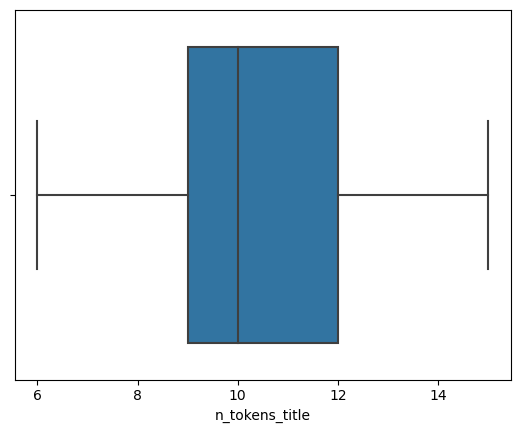

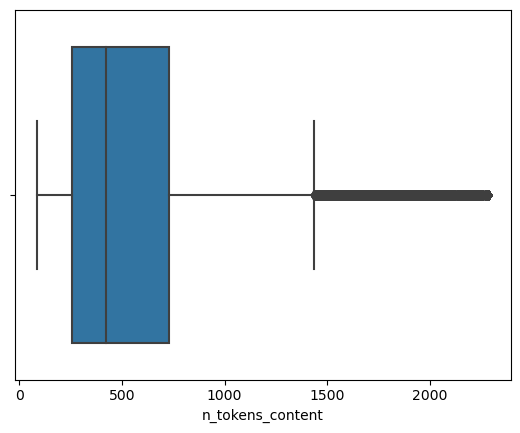

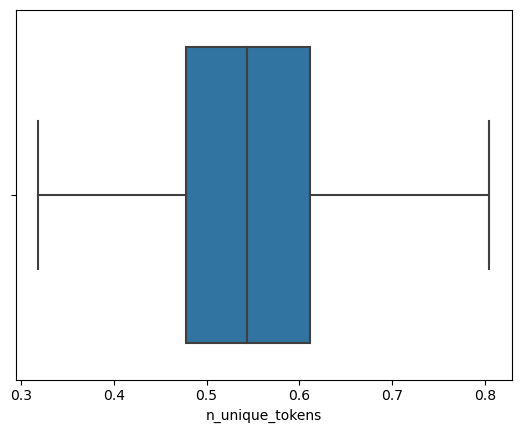

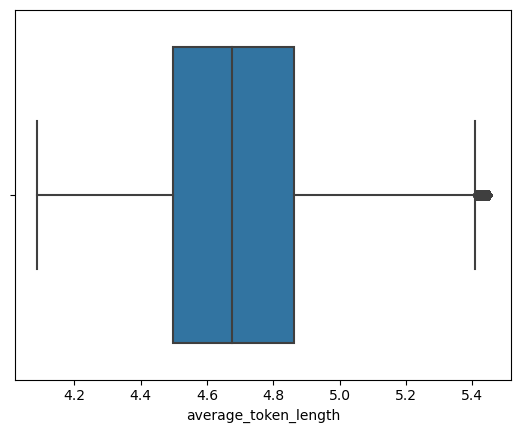

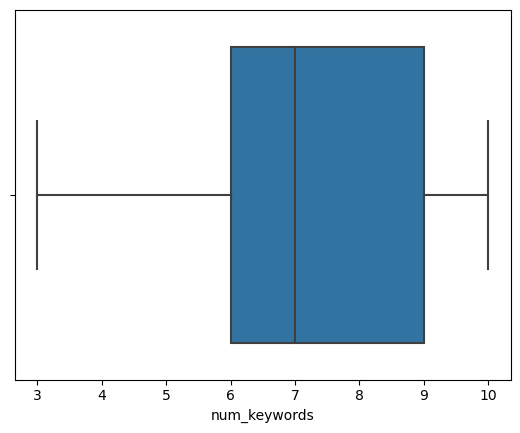

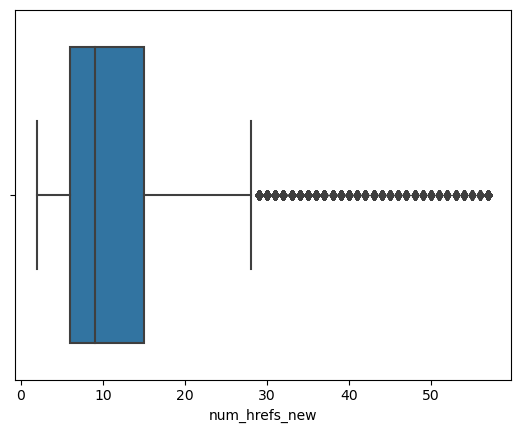

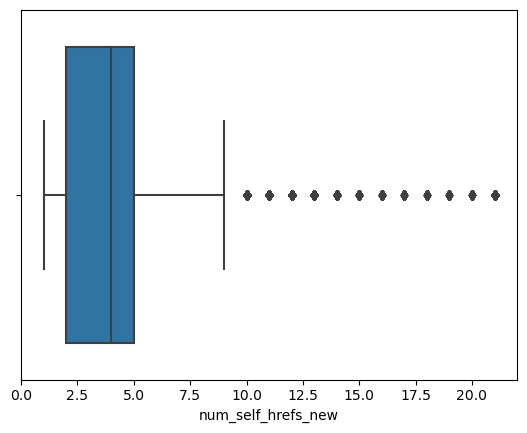

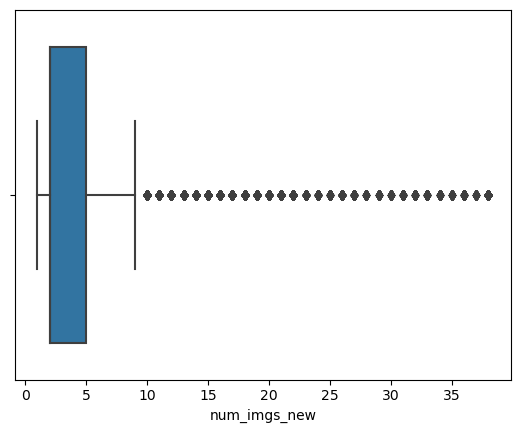

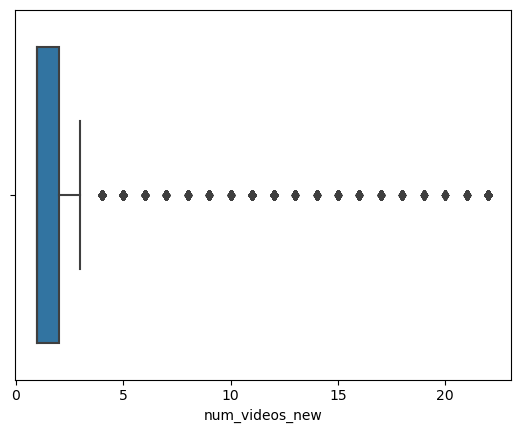

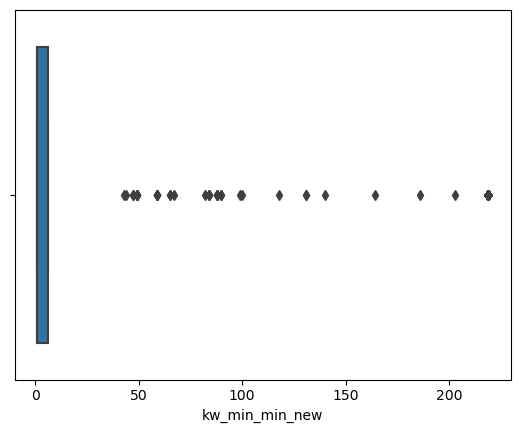

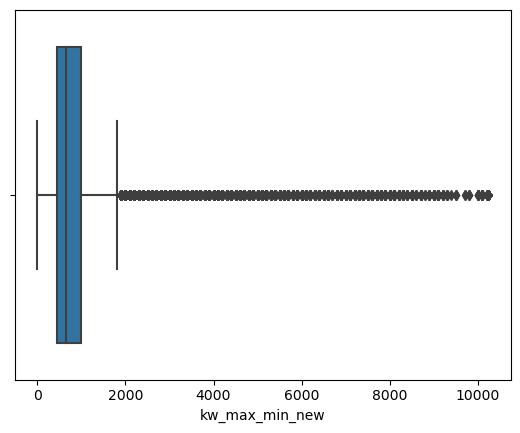

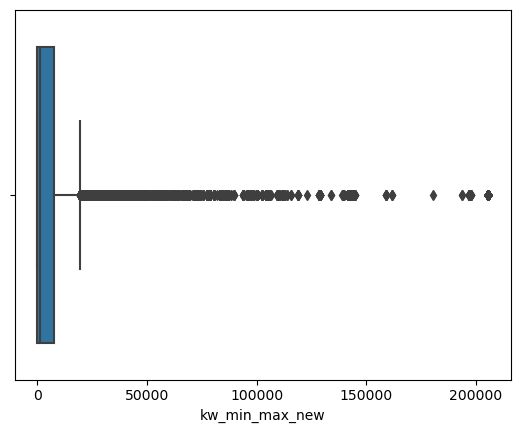

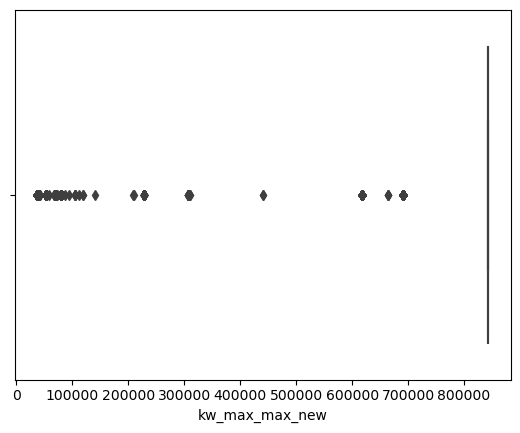

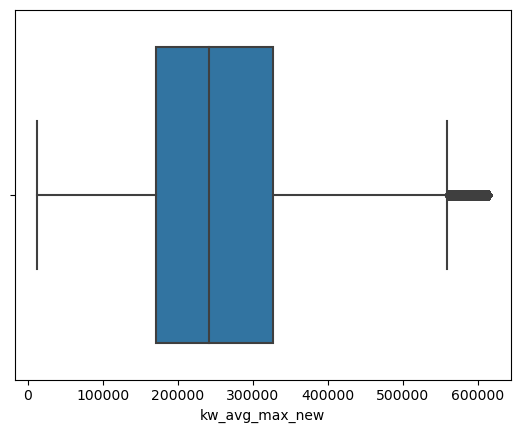

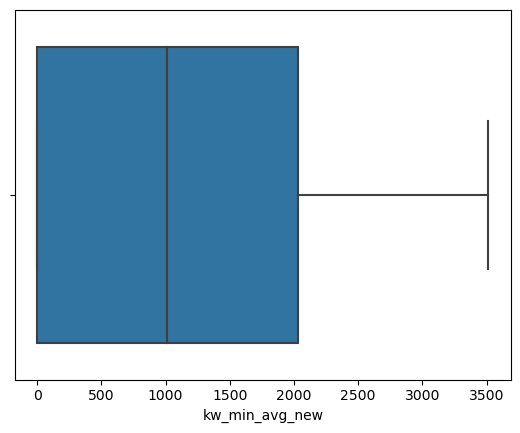

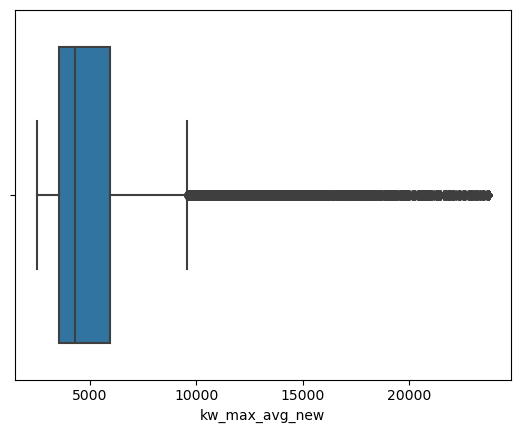

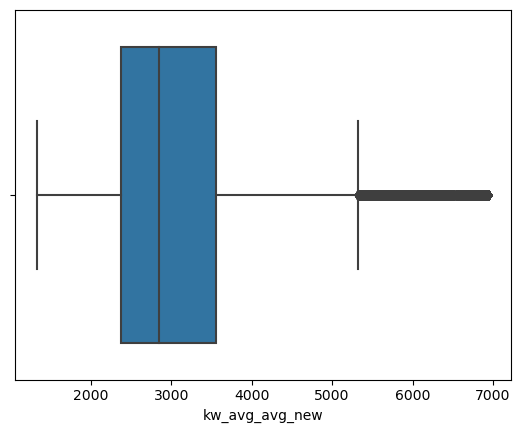

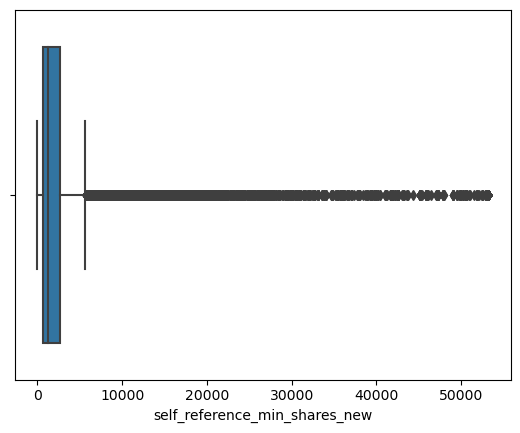

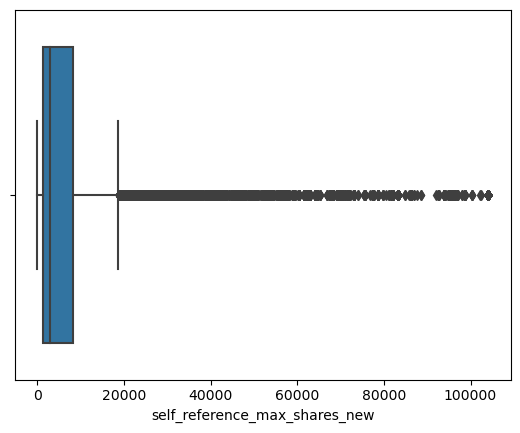

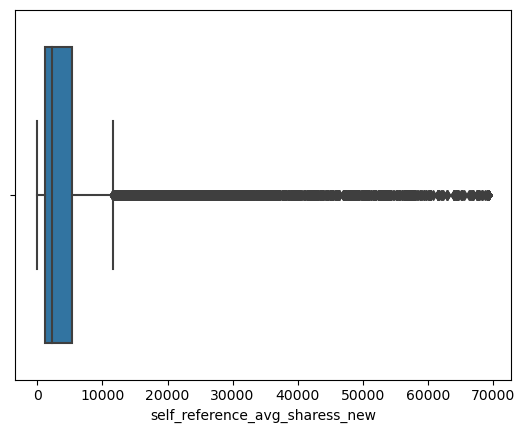

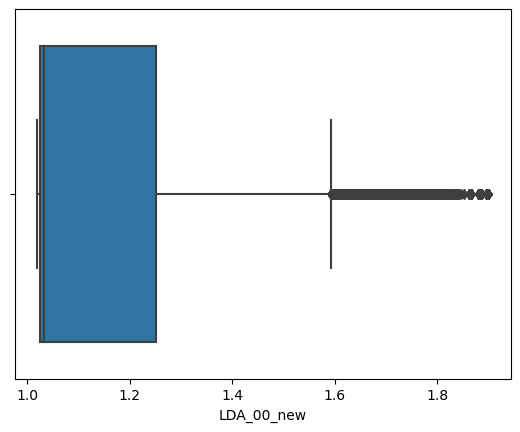

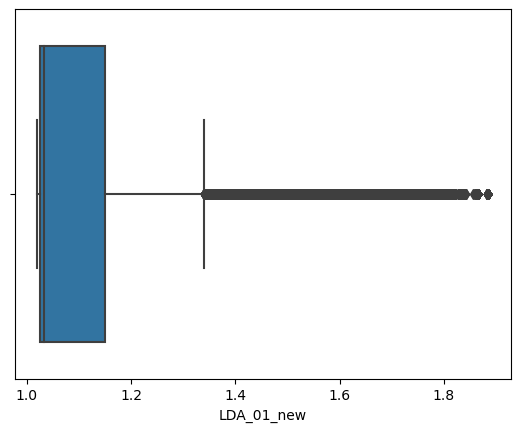

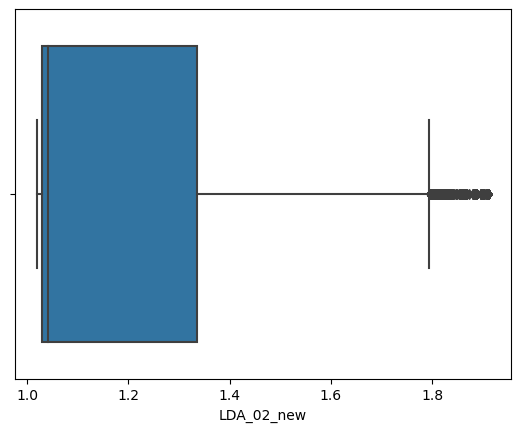

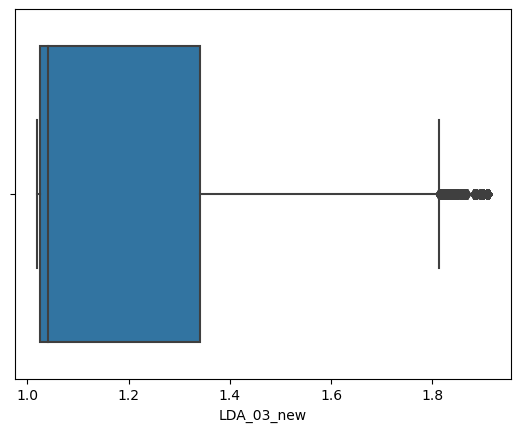

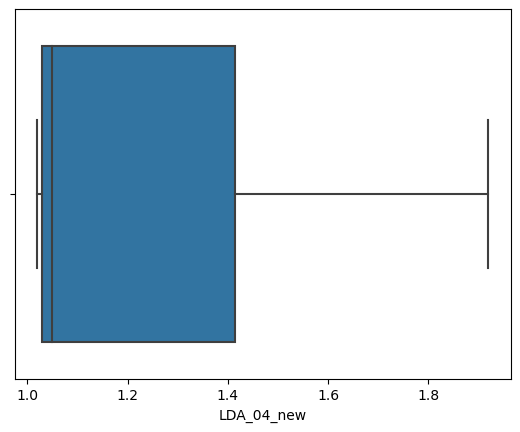

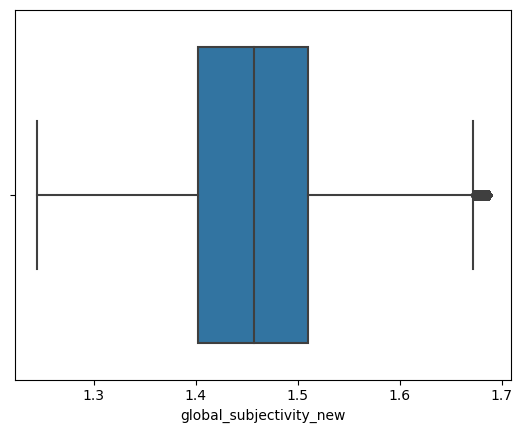

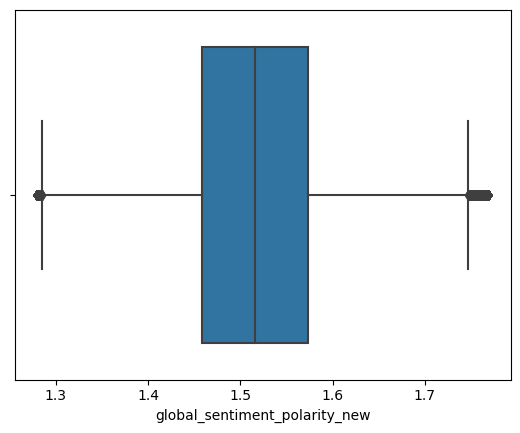

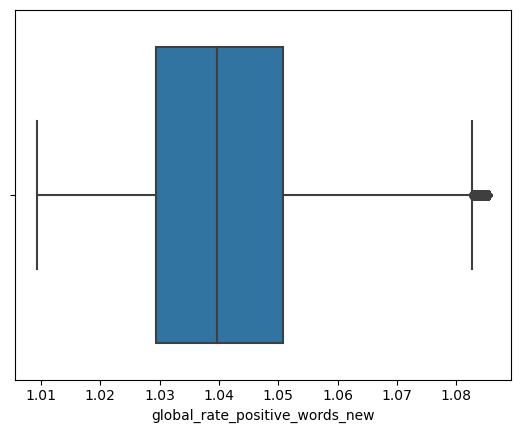

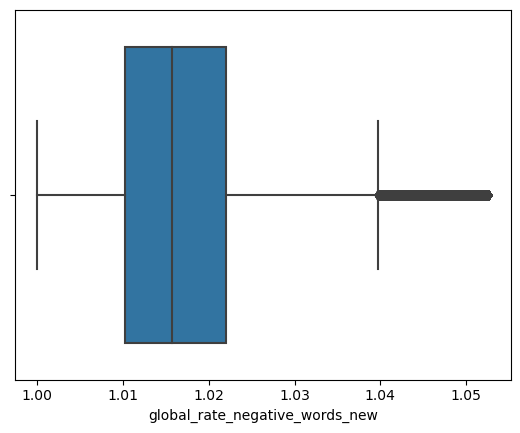

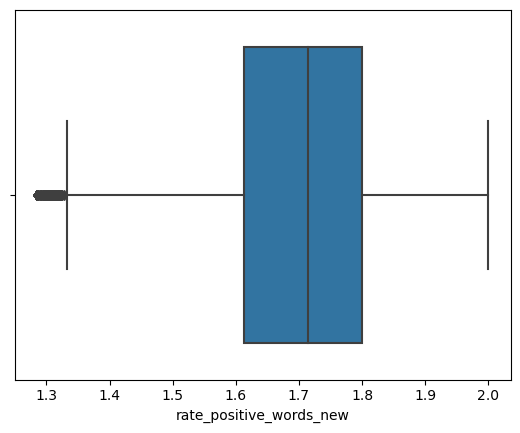

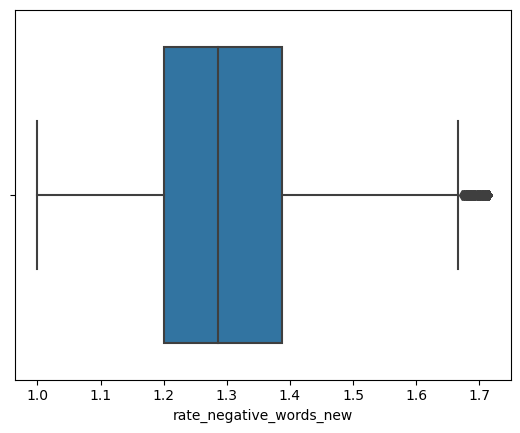

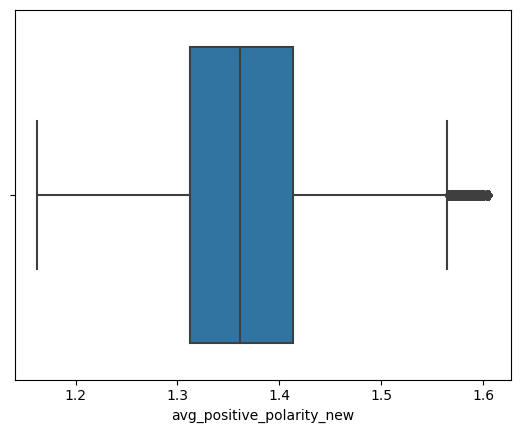

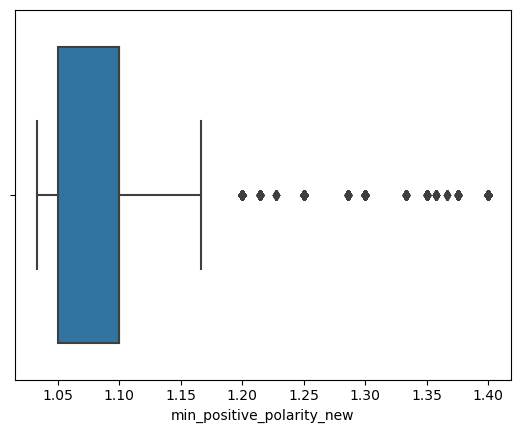

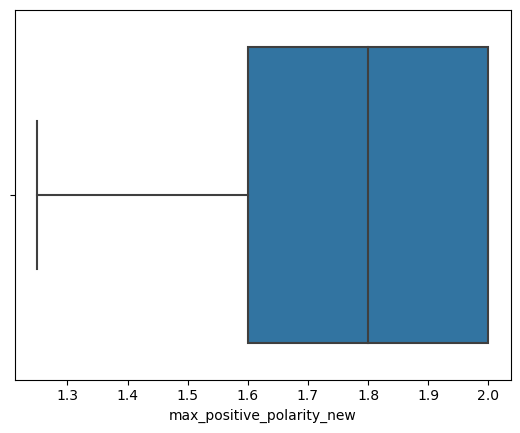

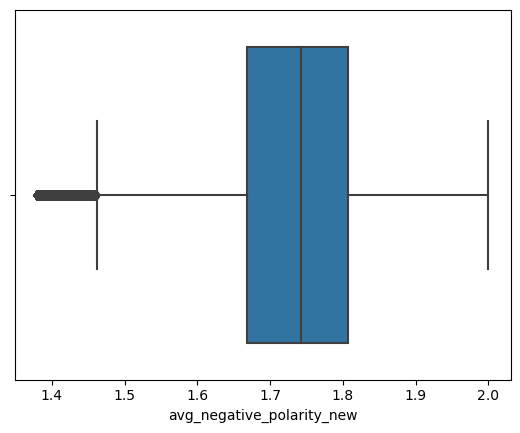

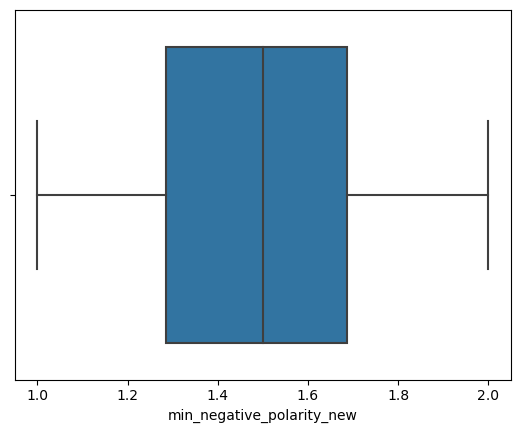

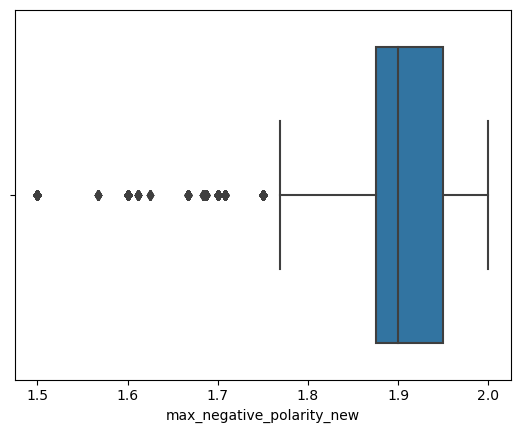

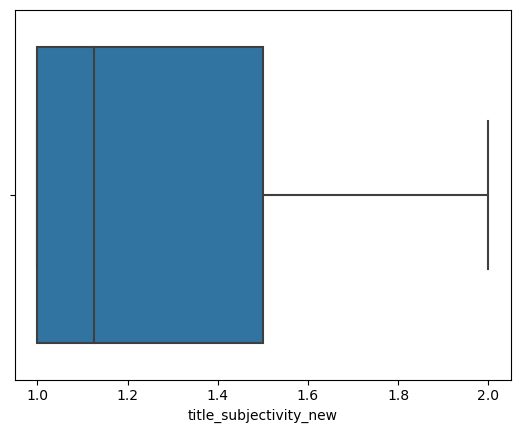

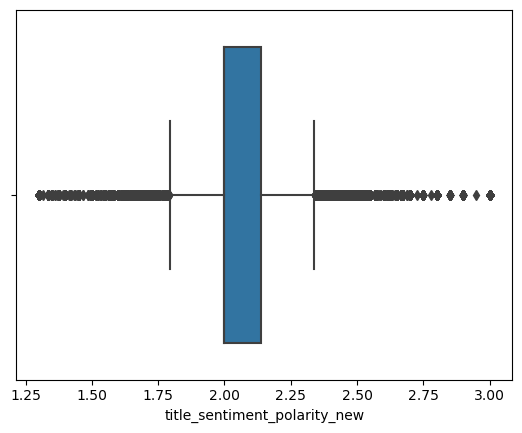

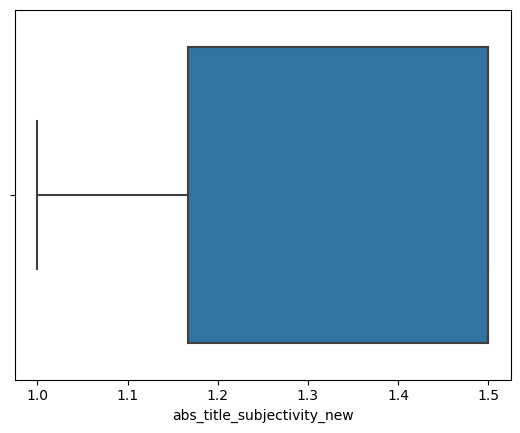

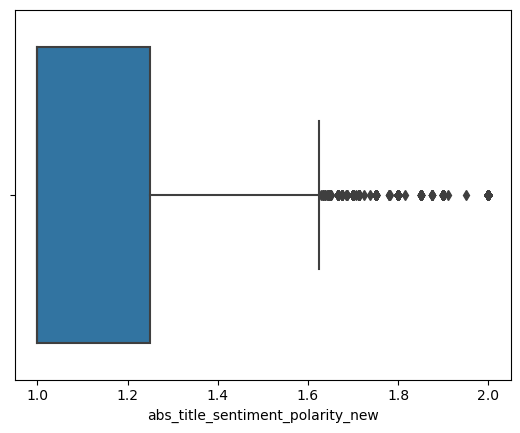

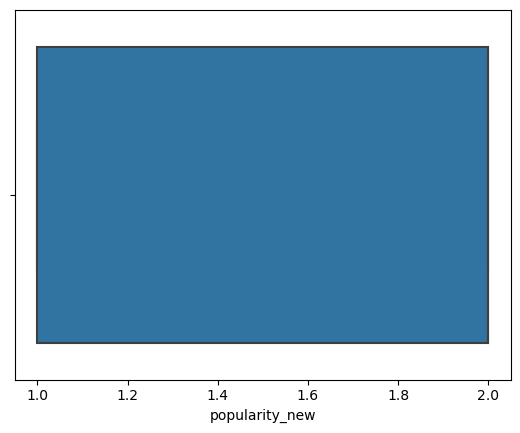

In [42]:
num_cols = df2_num_add.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df2_num_add[num_cols[i]])
    plt.show()

In [43]:
df2_num_add.shape

(38463, 42)

In [44]:
#df2_num_add.columns

In [45]:
#df2_cat.columns

In [46]:
# Create a 'top_data_channel' column based on the data_channel columns
#df2_cat['top_data_channel'] = df2_cat[['lifestyle', 'entertainment',
                             #'bus', 'socmed',
                             #'tech', 'world']].idxmax(axis=1)


In [47]:
# Print the unique values in the 'top_data_channel' column
#unique_top_data_channels = df2_cat['top_data_channel'].unique()
#print(f"Unique values in 'top_data_channel': {unique_top_data_channels}\n")

In [48]:
# Define a function to extract the last word from a string
#def extract_last_word(channel):
    #words = channel.split('_')
    #return words[-1]

In [49]:
# Apply the function to the 'top_data_channel' column and create a new 'top_data_channel_last_word' column
#df2_cat['top_data_channel_last_word'] = df2_cat['top_data_channel'].apply(extract_last_word)

In [50]:
# Print the unique values in the 'top_data_channel_last_word' column
#unique_last_words = df2_cat['top_data_channel_last_word'].unique()
#print(f"Unique last words in 'top_data_channel_last_word': {unique_last_words}\n")
#df2_cat = df2_cat.drop('top_data_channel',axis=1)

In [51]:
#df_final=pd.concat([df2_num_add,df2_cat],axis=1)

In [52]:
#df_final.shape

In [53]:
#df_final['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

In [54]:
#df_final.isnull().sum()

In [55]:
#df_final=df_final.dropna()

In [56]:
#df_final.columns

In [57]:
#df_final.shape

<AxesSubplot:>

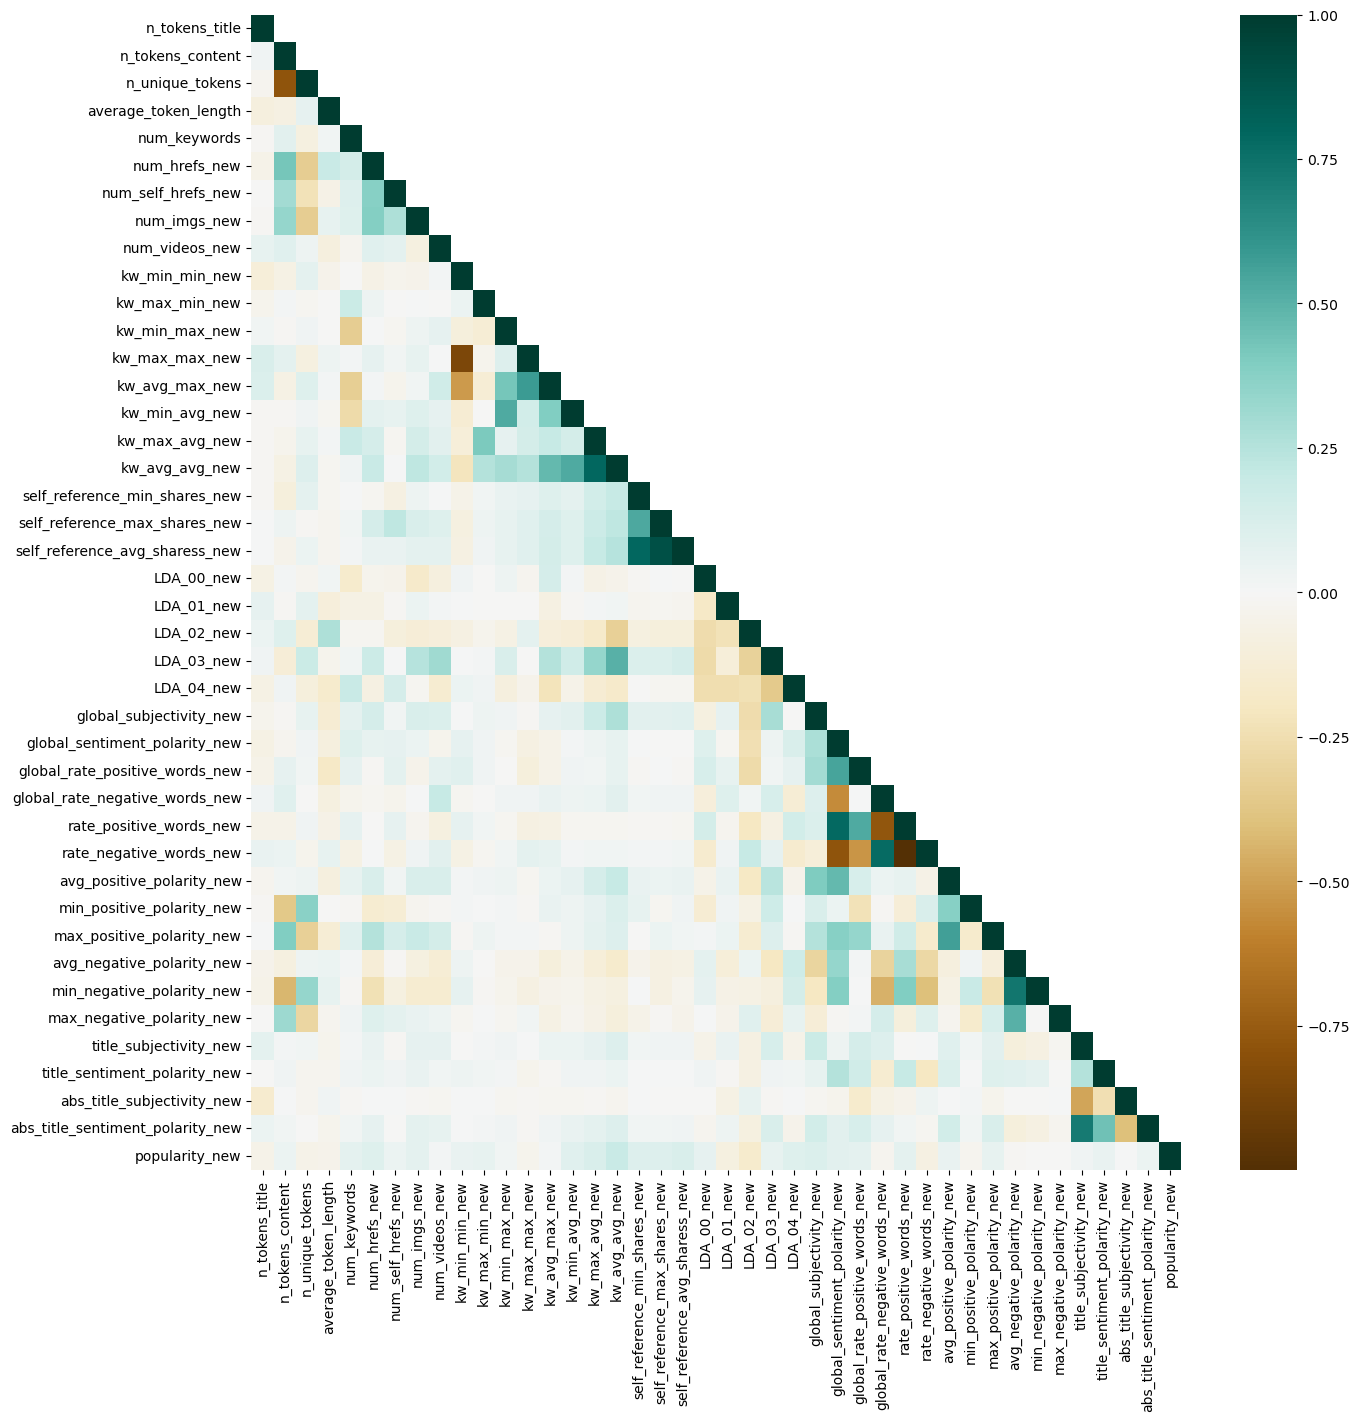

In [58]:
cor=df2_num_add.corr()
#ns.heatmap(cor)
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool_))
sns.heatmap(df_lt,cmap='BrBG')

In [59]:
# Again dropped some highly correlated attributes
df2_num_add.drop(['self_reference_avg_sharess_new'], axis=1, inplace=True)
df2_num_add.drop(['avg_negative_polarity_new'], axis=1, inplace=True)
df2_num_add.drop(['avg_positive_polarity_new'], axis=1, inplace=True)

In [60]:
df2_num_add.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'LDA_00_new', 'LDA_01_new', 'LDA_02_new', 'LDA_03_new', 'LDA_04_new',
       'global_subjectivity_new', 'global_sentiment_polarity_new',
       'global_rate_positive_words_new', 'global_rate_negative_words_new',
       'rate_positive_words_new', 'rate_negative_words_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'min_negative_polarity_new', 'max_negative_polarity_new',
       'title_subjectivity_new', 'title_sentiment_polarity_new',
       'abs_title_subjectivity_new', 'abs_title_sentiment_polarity_new',
       'popularity_new'],
    

In [61]:
from scipy.stats import chi2_contingency

In [62]:
def get_crosstabs(row, column, df, plot_data = False):

    # plot if requested
    if plot_data:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        sns.countplot(data=df, x=row, hue=column)  
        plt.xlabel(row)
        plt.ylabel('Count')
        plt.show()
        # doing this to keep from opening too many figs at once (eats memory)
        plt.close(fig);
      
    # create cross-tabulation
    xtab = pd.crosstab(df[row], df[column], margins = False)   
    print('observed data:\n', xtab)
    
    # analyze
    # don't generally use continuity correction for tables > 2 x 2; Rosner, Fundamentals of Biostatics, p. 394
    chi2, p_value, dof, expected = chi2_contingency(xtab, correction = False)
    print('expected data:\n', expected)
    print('chi-squared value: {:.4f} for {:.0f} dof; p-value = {:.4f}\n'.format(chi2, dof, p_value))
    
    return

In [63]:
df2_cat.columns

Index(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'is_weekend', 'lifestyle', 'entertainment', 'bus', 'socmed',
       'tech', 'world'],
      dtype='object')

In [64]:
df_final=pd.concat([df2_num_add,df2_cat],axis=1)

In [65]:
df_final.shape

(38463, 53)

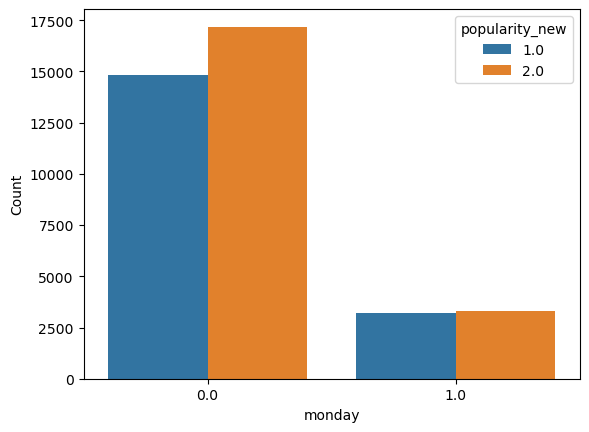

observed data:
 popularity_new    1.0    2.0
monday                      
0.0             14810  17182
1.0              3189   3282
expected data:
 [[14970.8553155 17021.1446845]
 [ 3028.1446845  3442.8553155]]
chi-squared value: 19.3085 for 1 dof; p-value = 0.0000



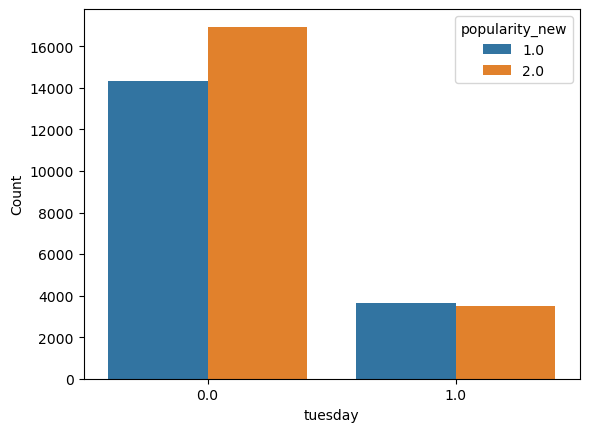

observed data:
 popularity_new    1.0    2.0
tuesday                     
0.0             14350  16942
1.0              3649   3522
expected data:
 [[14643.28596313 16648.71403687]
 [ 3355.71403687  3815.28596313]]
chi-squared value: 59.2189 for 1 dof; p-value = 0.0000



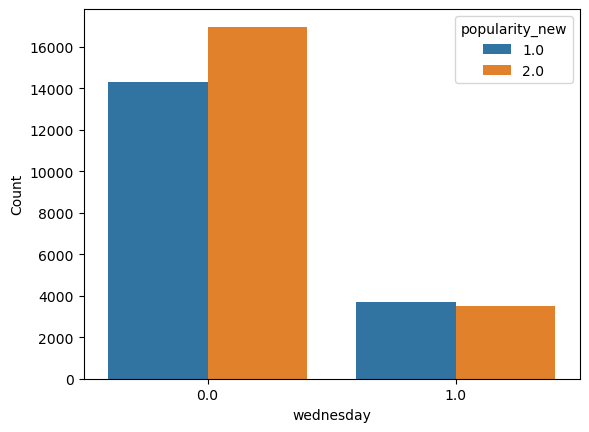

observed data:
 popularity_new    1.0    2.0
wednesday                   
0.0             14292  16966
1.0              3707   3498
expected data:
 [[14627.37545173 16630.62454827]
 [ 3371.62454827  3833.37545173]]
chi-squared value: 77.1539 for 1 dof; p-value = 0.0000



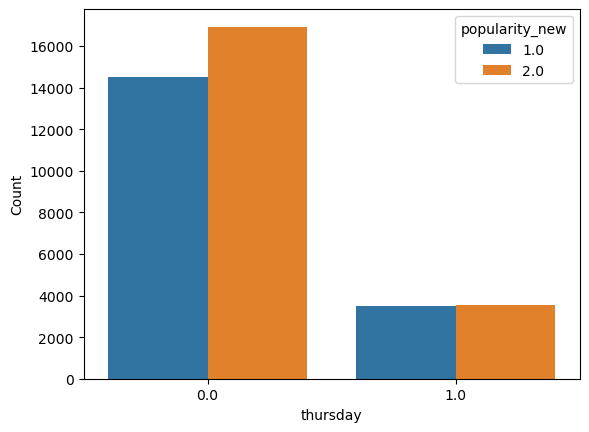

observed data:
 popularity_new    1.0    2.0
thursday                    
0.0             14486  16925
1.0              3513   3539
expected data:
 [[14698.97275304 16712.02724696]
 [ 3300.02724696  3751.97275304]]
chi-squared value: 31.6333 for 1 dof; p-value = 0.0000



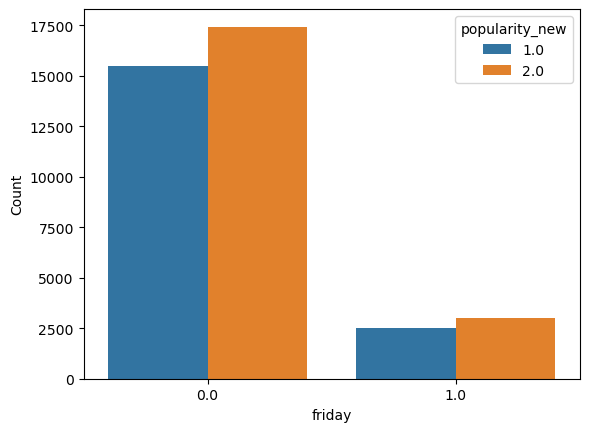

observed data:
 popularity_new    1.0    2.0
friday                      
0.0             15486  17439
1.0              2513   3025
expected data:
 [[15407.45846658 17517.54153342]
 [ 2591.54153342  2946.45846658]]
chi-squared value: 5.2265 for 1 dof; p-value = 0.0222



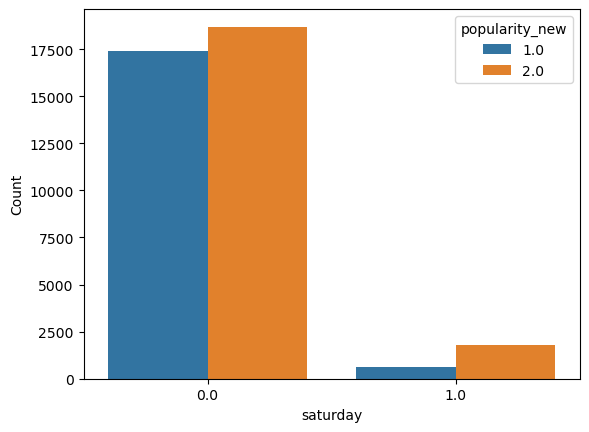

observed data:
 popularity_new    1.0    2.0
saturday                    
0.0             17403  18691
1.0               596   1773
expected data:
 [[16890.41172035 19203.58827965]
 [ 1108.58827965  1260.41172035]]
chi-squared value: 474.7094 for 1 dof; p-value = 0.0000



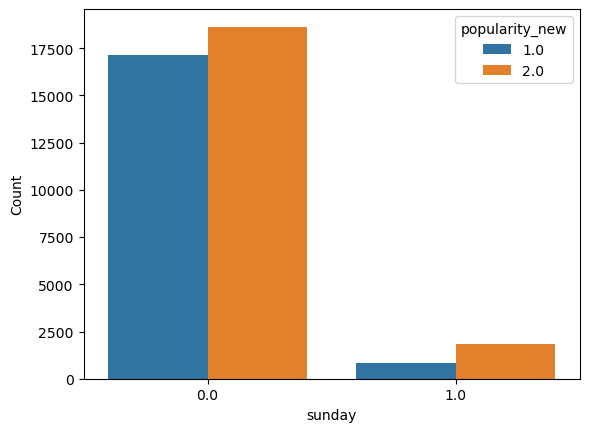

observed data:
 popularity_new    1.0    2.0
sunday                      
0.0             17167  18639
1.0               832   1825
expected data:
 [[16755.64032967 19050.35967033]
 [ 1243.35967033  1413.64032967]]
chi-squared value: 274.7810 for 1 dof; p-value = 0.0000



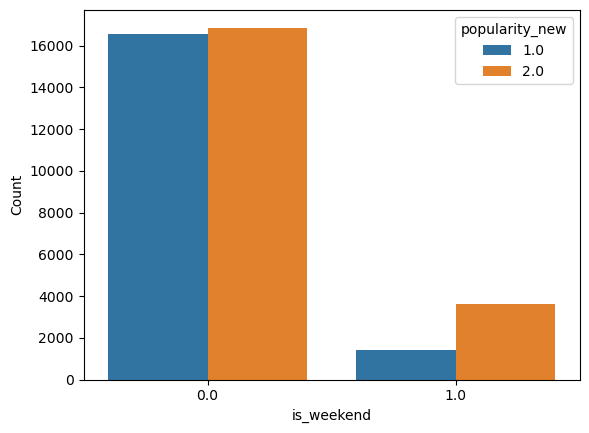

observed data:
 popularity_new    1.0    2.0
is_weekend                  
0.0             16571  16866
1.0              1428   3598
expected data:
 [[15647.05205002 17789.94794998]
 [ 2351.94794998  2674.05205002]]
chi-squared value: 784.7581 for 1 dof; p-value = 0.0000



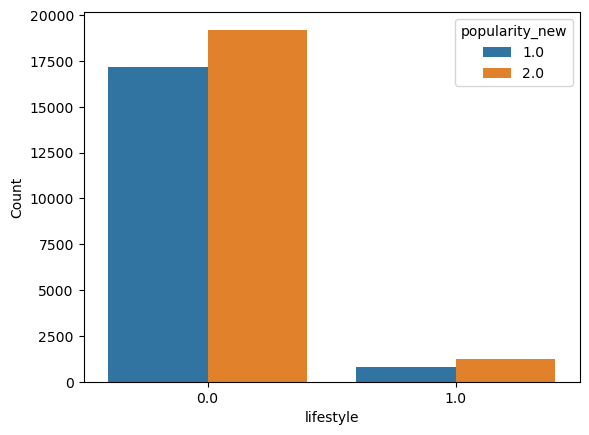

observed data:
 popularity_new    1.0    2.0
lifestyle                   
0.0             17184  19202
1.0               815   1262
expected data:
 [[17027.05493591 19358.94506409]
 [  971.94506409  1105.05493591]]
chi-squared value: 50.3518 for 1 dof; p-value = 0.0000



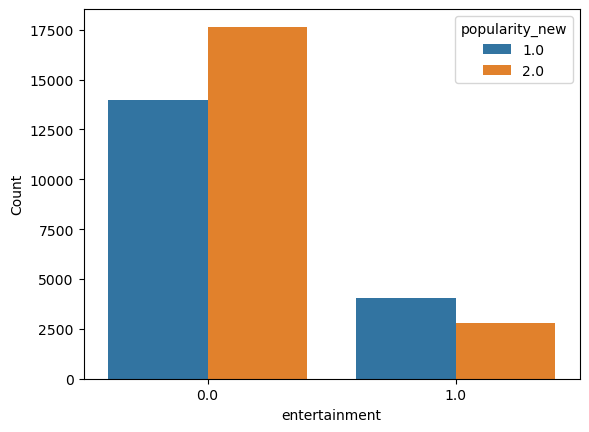

observed data:
 popularity_new    1.0    2.0
entertainment               
0.0             13954  17653
1.0              4045   2811
expected data:
 [[14790.6921717 16816.3078283]
 [ 3208.3078283  3647.6921717]]
chi-squared value: 499.0774 for 1 dof; p-value = 0.0000



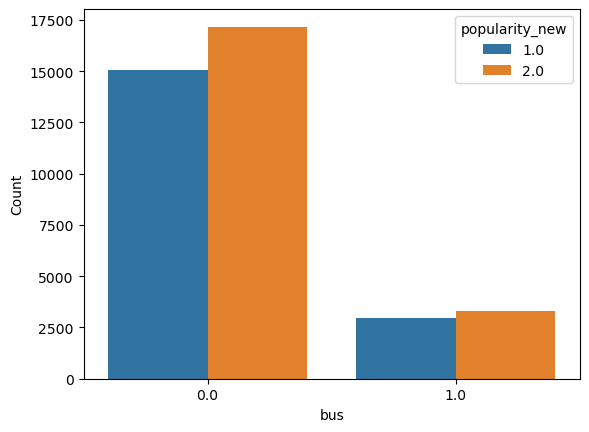

observed data:
 popularity_new    1.0    2.0
bus                         
0.0             15061  17167
1.0              2938   3297
expected data:
 [[15081.29298287 17146.70701713]
 [ 2917.70701713  3317.29298287]]
chi-squared value: 0.3166 for 1 dof; p-value = 0.5737



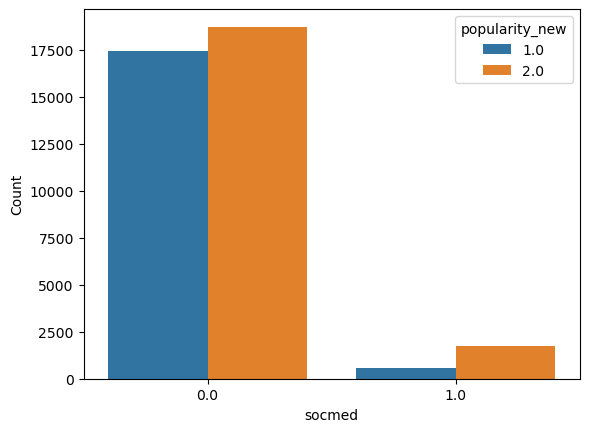

observed data:
 popularity_new    1.0    2.0
socmed                      
0.0             17441  18711
1.0               558   1753
expected data:
 [[16917.55318098 19234.44681902]
 [ 1081.44681902  1229.55318098]]
chi-squared value: 506.6446 for 1 dof; p-value = 0.0000



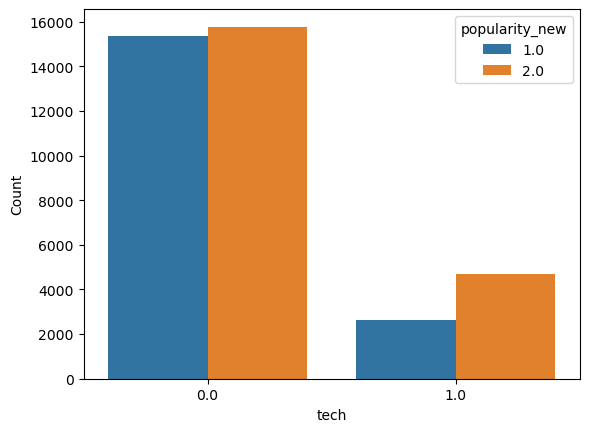

observed data:
 popularity_new    1.0    2.0
tech                        
0.0             15366  15772
1.0              2633   4692
expected data:
 [[14571.22070561 16566.77929439]
 [ 3427.77929439  3897.22070561]]
chi-squared value: 427.8439 for 1 dof; p-value = 0.0000



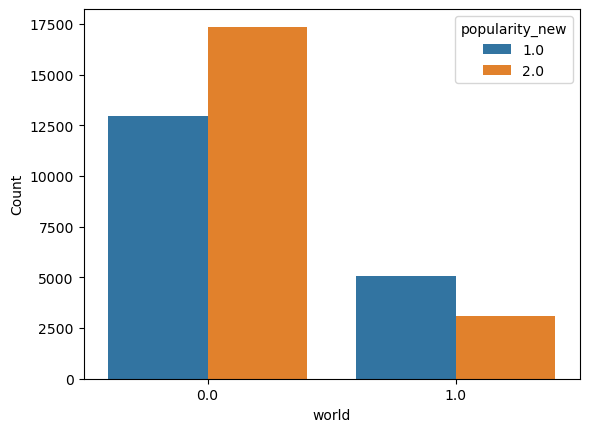

observed data:
 popularity_new    1.0    2.0
world                       
0.0             12939  17356
1.0              5060   3108
expected data:
 [[14176.73361412 16118.26638588]
 [ 3822.26638588  4345.73361412]]
chi-squared value: 956.4411 for 1 dof; p-value = 0.0000



In [66]:
col_list = ['monday', 'tuesday', 'wednesday',
       'thursday', 'friday', 'saturday',
       'sunday', 'is_weekend', 'lifestyle',
       'entertainment', 'bus',
       'socmed', 'tech',
       'world']
for cat_var in col_list:
  get_crosstabs(cat_var, 'popularity_new', df_final, plot_data = True)

In [67]:
df_final.drop(['saturday'], axis=1, inplace=True)
df_final.drop(['sunday'], axis=1, inplace=True)

In [68]:
df_final.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,average_token_length,num_keywords,num_hrefs_new,num_self_hrefs_new,num_imgs_new,num_videos_new,kw_min_min_new,...,wednesday,thursday,friday,is_weekend,lifestyle,entertainment,bus,socmed,tech,world
0,12.0,219.0,0.663594,4.680365,5.0,5.0,3.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,9.0,255.0,0.604743,4.913725,4.0,4.0,2.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9.0,211.0,0.575130,4.393365,6.0,4.0,2.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,9.0,531.0,0.503788,4.404896,7.0,10.0,1.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13.0,1072.0,0.415646,4.682836,7.0,20.0,20.0,21.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
df_final['popularity_new'] = df_final['popularity_new'] -1 

In [70]:
df_final['popularity_new']

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
39639    1.0
39640    1.0
39641    1.0
39642    0.0
39643    0.0
Name: popularity_new, Length: 38463, dtype: float64

In [71]:
df_2_cat = df_final.copy()

In [72]:
modelscore=[]
X=df_2_cat.drop(['popularity_new'],axis=1)
y=df_2_cat['popularity_new']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

In [73]:
# Checking the training data 
X_train.shape

(30770, 50)

# Modeling and Model Performance and Comparison

In [74]:
#inputs:
#learner: the learning algorithm to be trained and predicted on
#sample_size: the size of samples (number) to be drawn from training set
#X_train: features training set
#y_train: income training set
#X_test: features testing set
#y_test: income testing set

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    results = {}
    
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    results['train_time'] = end-start

        
    # Get predictions on the first 4000 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the training samples
    results['acc_train'] = accuracy_score(y_train,predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the training samples
    results['f_train'] = fbeta_score(y_train,predictions_train,beta=1)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    # Compute AUC on the the training samples
    results['auc_train'] = roc_auc_score(y_train,predictions_train)
        
    # Compute AUC on the test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print ("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test']) )
    
    # Return the results

    return results

In [75]:
# Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from time import time
from IPython.display import display
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatche

In [76]:
# Naive Bayes
# Logistic Regression 
# K Nearest Neighbors 
# Random Forest


# Initialize the four models
clf_A = GaussianNB()
clf_B = LogisticRegression(random_state=100,C=1.0)
clf_C = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
clf_D = RandomForestClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A,clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_C:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)            
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics for the four machine learning models chosen

GaussianNB trained on 307 samples.
GaussianNB with accuracy 0.5558299753022228, F1 0.4823511589153159 and AUC 0.5668104606382661.
GaussianNB trained on 3077 samples.
GaussianNB with accuracy 0.5763681268685819, F1 0.5231894659839063 and AUC 0.5855345933285749.
GaussianNB trained on 30770 samples.
GaussianNB with accuracy 0.562459378655921, F1 0.48215384615384616 and AUC 0.5742826358941234.
LogisticRegression trained on 307 samples.
LogisticRegression with accuracy 0.6073053425191732, F1 0.648025166025865 and AUC 0.6024482178865408.
LogisticRegression trained on 3077 samples.
LogisticRegression with accuracy 0.6174444300012999, F1 0.685341601625147 and AUC 0.6063964004917672.
LogisticRegression trained on 30770 samples.
LogisticRegression with accuracy 0.608995190432861, F1 0.6489262371615313 and AUC 0.6042659519034269.
KNeighborsClassifier trained on 307 samples.
KNeighborsClassifier with accuracy 0.5442610165085142, F1 0.5759554910498307 and AUC 0.5417092304059794.
KNeighborsClassifie

In [77]:
#Visualization code to display results of models side by side for comparison since we're trying to compare performance against multiple models

import matplotlib.patches as mpatches
def evaluate(results,name):
  
    # Create figure
    fig, ax = plt.subplots(2, 4, figsize = (20,10))

    # Constants
    bar_width = 0.15
    colors = ['blue','green','yellow','red']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'auc_train','pred_time', 'acc_test',\
                                    'f_test', 'auc_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//4, j%4].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//4, j%4].set_xticks([0.45, 1.45, 2.45])
                ax[j//4, j%4].set_xticklabels(["1%", "10%", "100%"])
                ax[j//4, j%4].set_xlim((-0.1, 3.0))
    
    # Add labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[0, 3].set_ylabel("AUC")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    ax[1, 3].set_ylabel("AUC")
    ax[1, 0].set_xlabel("Training Set Size")
    ax[1, 1].set_xlabel("Training Set Size")
    ax[1, 2].set_xlabel("Training Set Size")
    ax[1, 3].set_xlabel("Training Set Size")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[0, 3].set_title("AUC on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    ax[1, 3].set_title("AUC on Testing Subset")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[0, 3].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    ax[1, 3].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches,  bbox_to_anchor = (-1.5, 2.75),\
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Four Machine Learning Models", fontsize = 16, y = 1.10)
    plt.savefig(name)
    plt.tight_layout()
    plt.show()

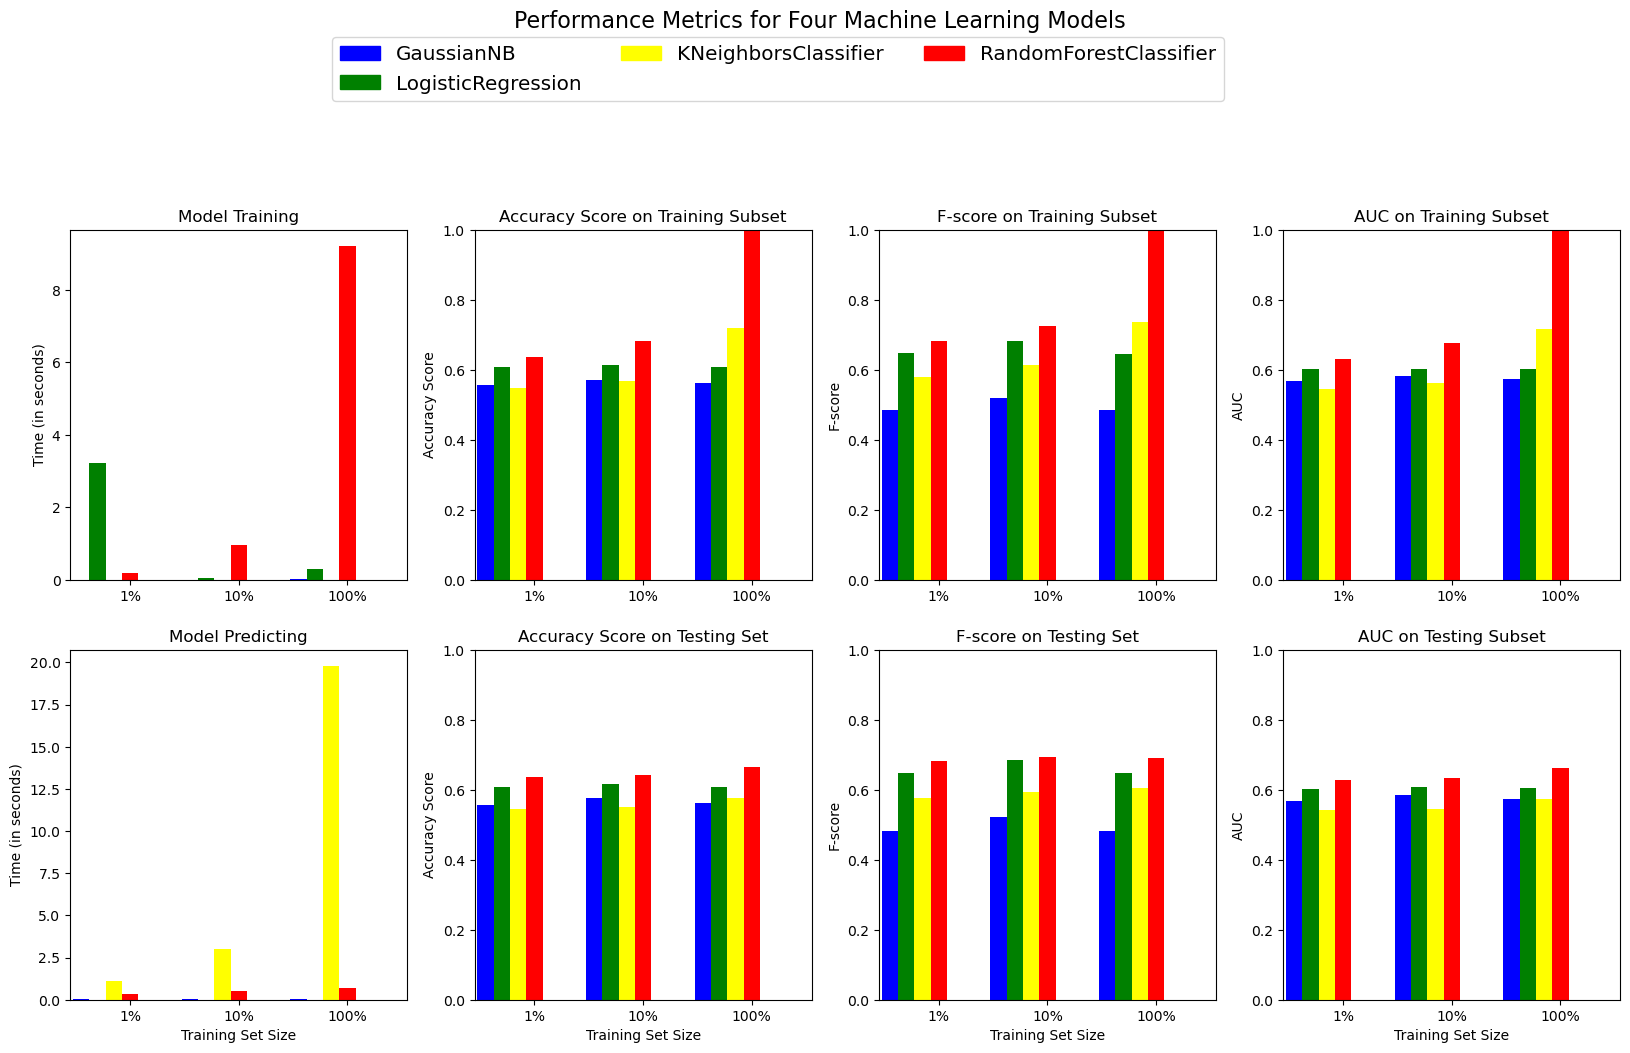

In [78]:
evaluate(results,'results.pdf')

In [79]:
#inputs:
#learner: the learning algorithm to be trained and predicted on
#sample_size: the size of samples (number) to be drawn from training set
#X_train: features training set
#y_train: income training set
#X_test: features testing set
#y_test: income testing set

def train_predict_graph(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    results = {}

    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    results['train_time'] = end-start
        
    # Get predictions on the  training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    
    # Return the results
    cm=confusion_matrix(y_test,predictions_test)
    df_cm = pd.DataFrame(cm, range(2), range(2))
    plt.figure(figsize=(5,3))
    ax = sns.heatmap(cm, cmap="Blues", annot=True, annot_kws={"size": 18}, fmt="d")
    ax.xaxis.set_ticklabels(["unpopular", "popular"], size=14)
    ax.yaxis.set_ticklabels(["unpopular", "popular"], size=14, rotation=0)
    
    from sklearn import metrics
    auc = metrics.roc_auc_score(y_test,predictions_test)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions_test,pos_label = 1.0)
    plt.figure(figsize=(6,4), dpi=100)
    plt.axis('scaled')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'b')
    plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='red')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
    
    
    plt.show()
    return results

GaussianNB trained on 307 samples.


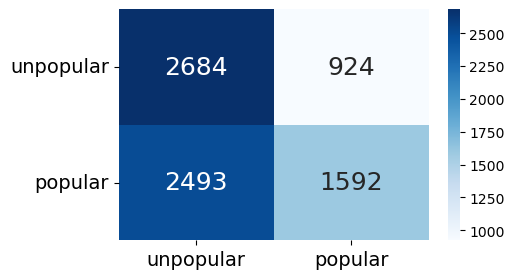

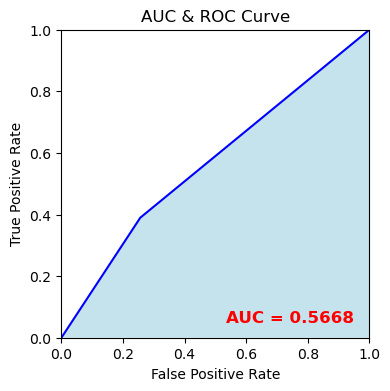

GaussianNB trained on 3077 samples.


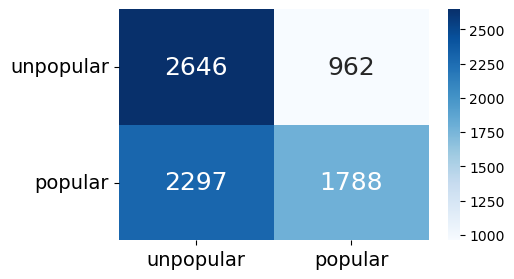

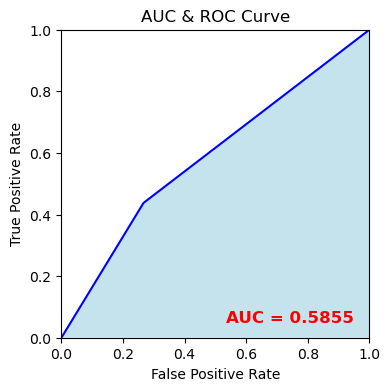

GaussianNB trained on 30770 samples.


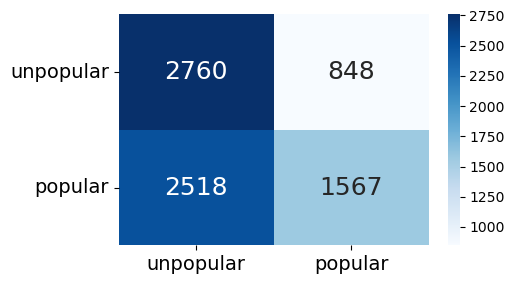

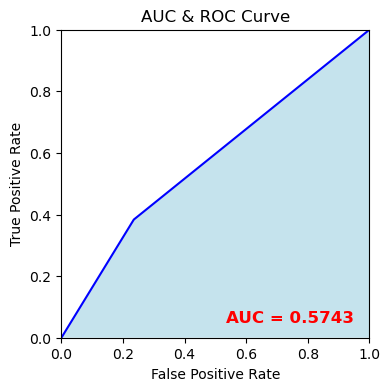

LogisticRegression trained on 307 samples.


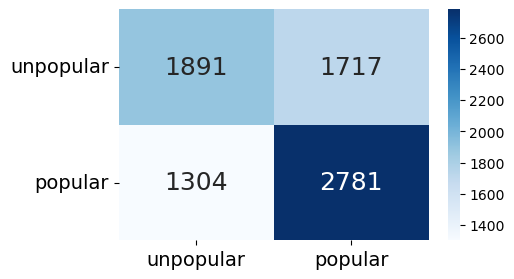

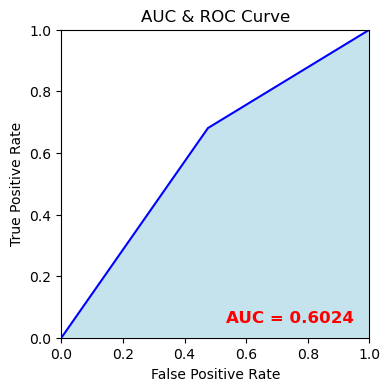

LogisticRegression trained on 3077 samples.


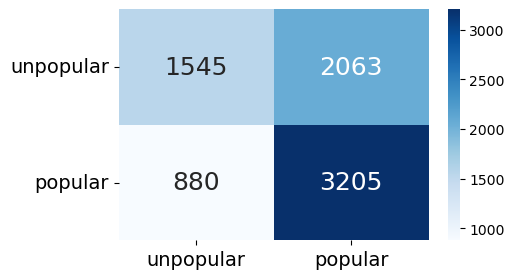

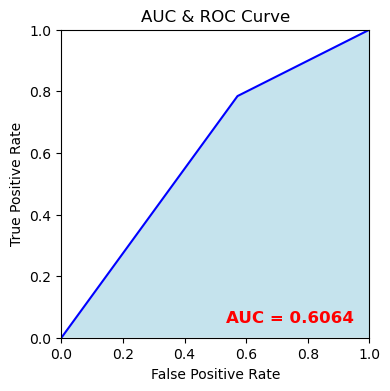

LogisticRegression trained on 30770 samples.


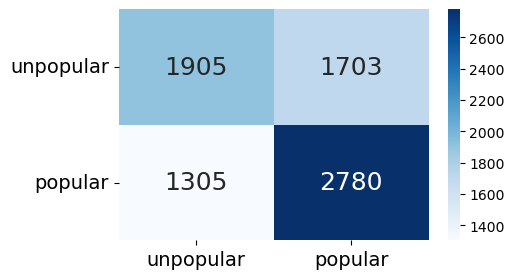

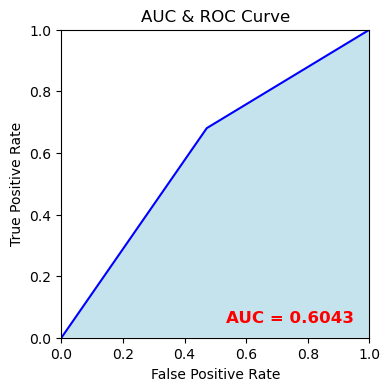

KNeighborsClassifier trained on 307 samples.


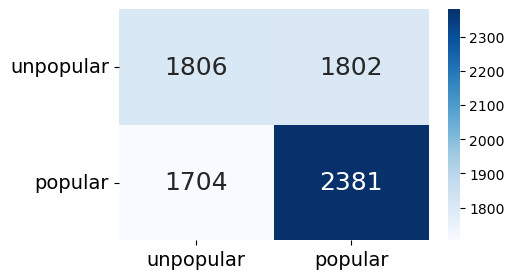

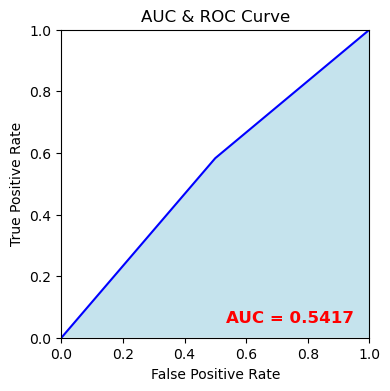

KNeighborsClassifier trained on 3077 samples.


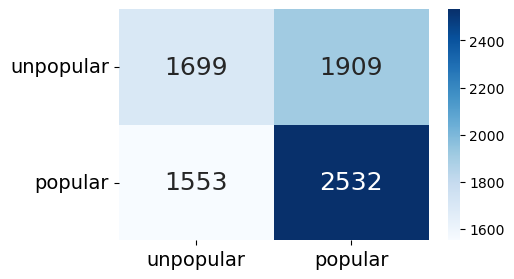

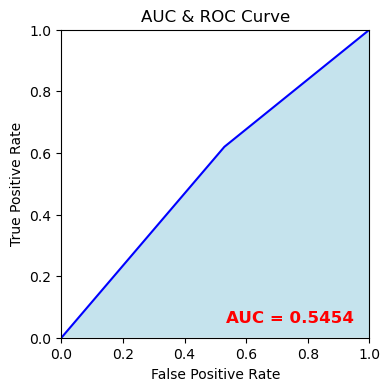

KNeighborsClassifier trained on 30770 samples.


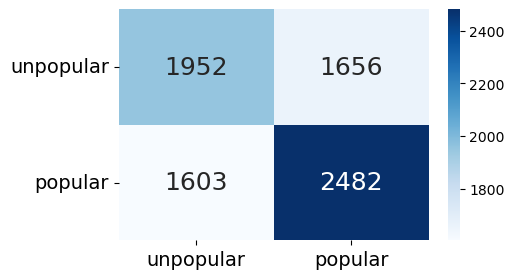

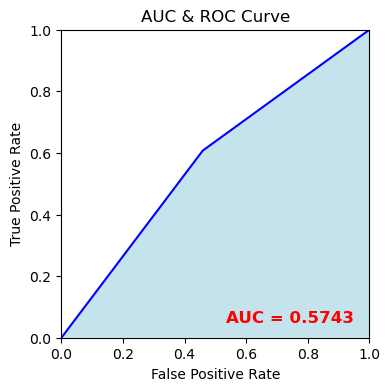

RandomForestClassifier trained on 307 samples.


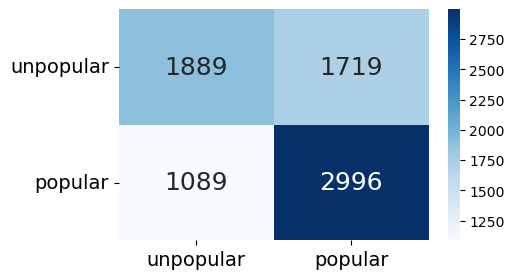

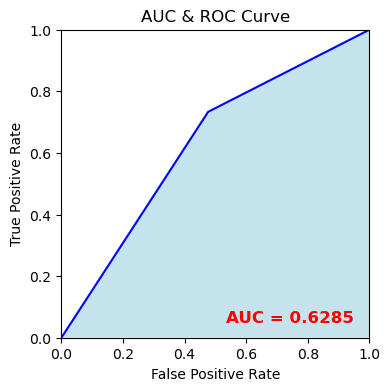

RandomForestClassifier trained on 3077 samples.


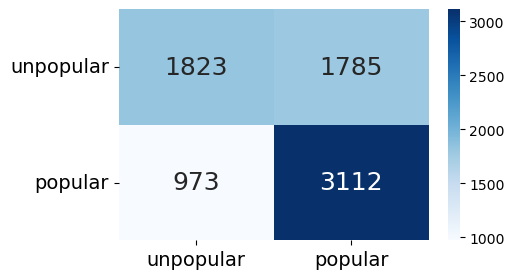

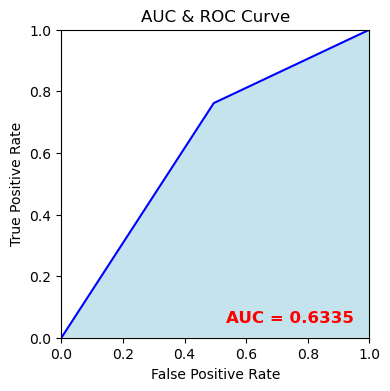

RandomForestClassifier trained on 30770 samples.


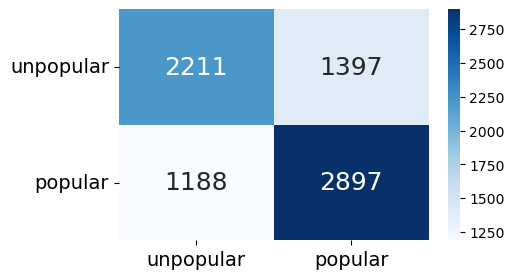

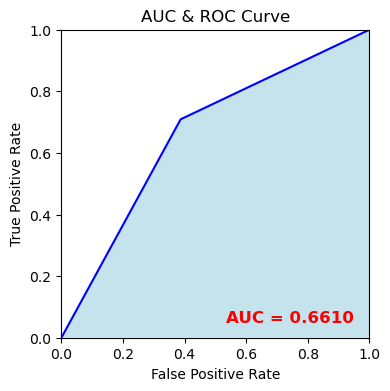

In [80]:
# Naive Bayes
# Logistic Regression 
# K Nearest Neighbors 
# Random Forest


# Initialize the four models
clf_A = GaussianNB()
clf_B = LogisticRegression(random_state=100,C=1.0)
clf_C = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
clf_D = RandomForestClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A,clf_B, clf_C, clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict_graph(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict_graph(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_C:
            results[clf_name][i] = \
            train_predict_graph(clf, samples, X_train, y_train, X_test, y_test)            
        else:
            results[clf_name][i] = \
            train_predict_graph(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the four machine learning models chosen

# Hyper Tuning on Random Forest Model

In [82]:
from sklearn.ensemble import RandomForestClassifier

nns = [1, 5, 10, 50]
accuracy = []

for n in nns:    
    clf = RandomForestClassifier(n_estimators=n, n_jobs=5, max_depth=50,
                                 random_state=0)
    clf.fit(X_train, y_train)  

    # predict the result
    y_pred = clf.predict(X_test)
    accuracy.append(100*accuracy_score(y_pred, y_test))

In [83]:
clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, max_depth=50,
                             random_state=0)
clf.fit(X_train, y_train)  

# predict the result
y_pred = clf.predict(X_test)
print ("Random Forest Classifer Result")
print ("Performance - " + str(100*accuracy_score(y_pred, y_test)) + "%")

Random Forest Classifer Result
Performance - 66.99597036266735%


[Text(0, 0.5, 'unpopular'), Text(0, 1.5, 'popular')]

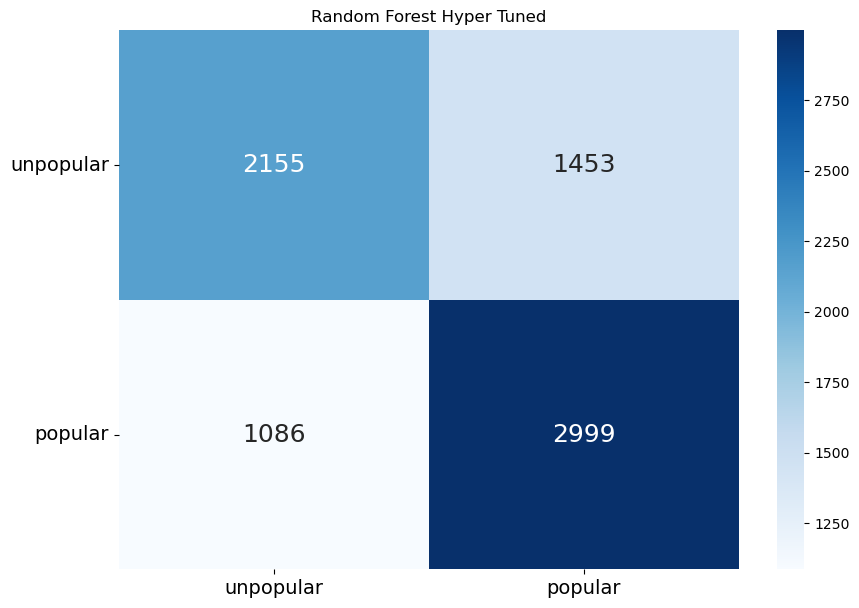

In [84]:
# Return the results
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(10,7))
ax = sns.heatmap(cm, cmap="Blues", annot=True, annot_kws={"size": 18}, fmt="d")
ax.set_title('Random Forest Hyper Tuned')
ax.xaxis.set_ticklabels(["unpopular", "popular"], size=14)
ax.yaxis.set_ticklabels(["unpopular", "popular"], size=14, rotation=0)

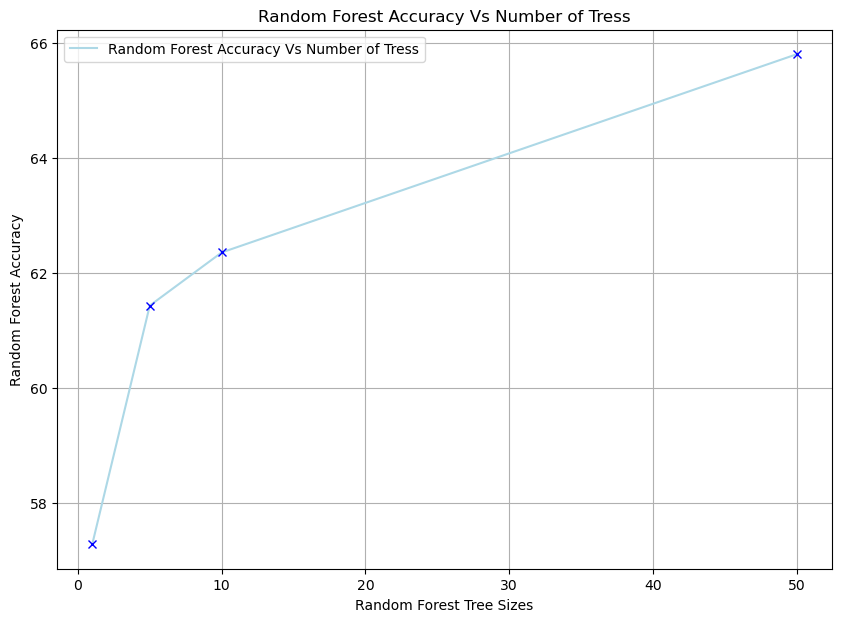

In [85]:
plt.figure(figsize=(10,7))
plt.plot(nns, accuracy, 'lightblue', label='Random Forest Accuracy Vs Number of Tress')
plt.plot(nns, accuracy, 'bx')
plt.xlabel('Random Forest Tree Sizes')
plt.ylabel('Random Forest Accuracy')
plt.legend()
plt.grid()
plt.title('Random Forest Accuracy Vs Number of Tress')
plt.show()

# Feature Importance in Final Model

In [92]:
clf_B

print(clf_B.coef_)
print(clf_B.intercept_)

[[-8.80490936e-07  1.19739251e-04 -6.24891318e-08 -2.45318422e-07
   4.42547731e-07  4.01728189e-06  5.26347022e-07  1.64526538e-06
  -2.93867139e-07  2.08486497e-07 -5.55214443e-06 -6.54259751e-07
  -1.10799246e-06 -8.16924665e-07  8.37566127e-05 -1.11749834e-05
   3.25648599e-04  1.21004998e-05  1.01948187e-05  7.72439607e-08
  -1.58762518e-07 -2.53177700e-07 -6.80720923e-08  1.53657865e-07
  -2.33996568e-08 -2.39295450e-08 -3.68580771e-08 -4.45958160e-08
  -4.90951477e-09 -1.19370604e-07 -6.07075126e-08 -2.00905681e-08
  -5.65484286e-08 -7.31483051e-08 -1.82002582e-08 -2.03884860e-08
  -4.54349386e-08 -1.85365316e-08 -5.31782027e-08 -1.04920812e-07
  -1.16304535e-07 -7.84715245e-08  2.82264053e-08  2.83148747e-07
   3.21468912e-08 -2.71796144e-07  2.00070798e-08  1.56533493e-07
   2.82597543e-07 -3.03727696e-07]]
[-4.14999224e-08]


In [93]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf_B.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [95]:
print(importances)

                           Attribute    Importance
16                    kw_avg_avg_new  3.256486e-04
1                   n_tokens_content  1.197393e-04
14                    kw_min_avg_new  8.375661e-05
17     self_reference_min_shares_new  1.210050e-05
18     self_reference_max_shares_new  1.019482e-05
5                      num_hrefs_new  4.017282e-06
7                       num_imgs_new  1.645265e-06
6                 num_self_hrefs_new  5.263470e-07
4                       num_keywords  4.425477e-07
43                        is_weekend  2.831487e-07
48                              tech  2.825975e-07
9                     kw_min_min_new  2.084865e-07
47                            socmed  1.565335e-07
23                        LDA_04_new  1.536579e-07
19                        LDA_00_new  7.724396e-08
44                         lifestyle  3.214689e-08
42                            friday  2.822641e-08
46                               bus  2.000708e-08
28           rate_positive_word

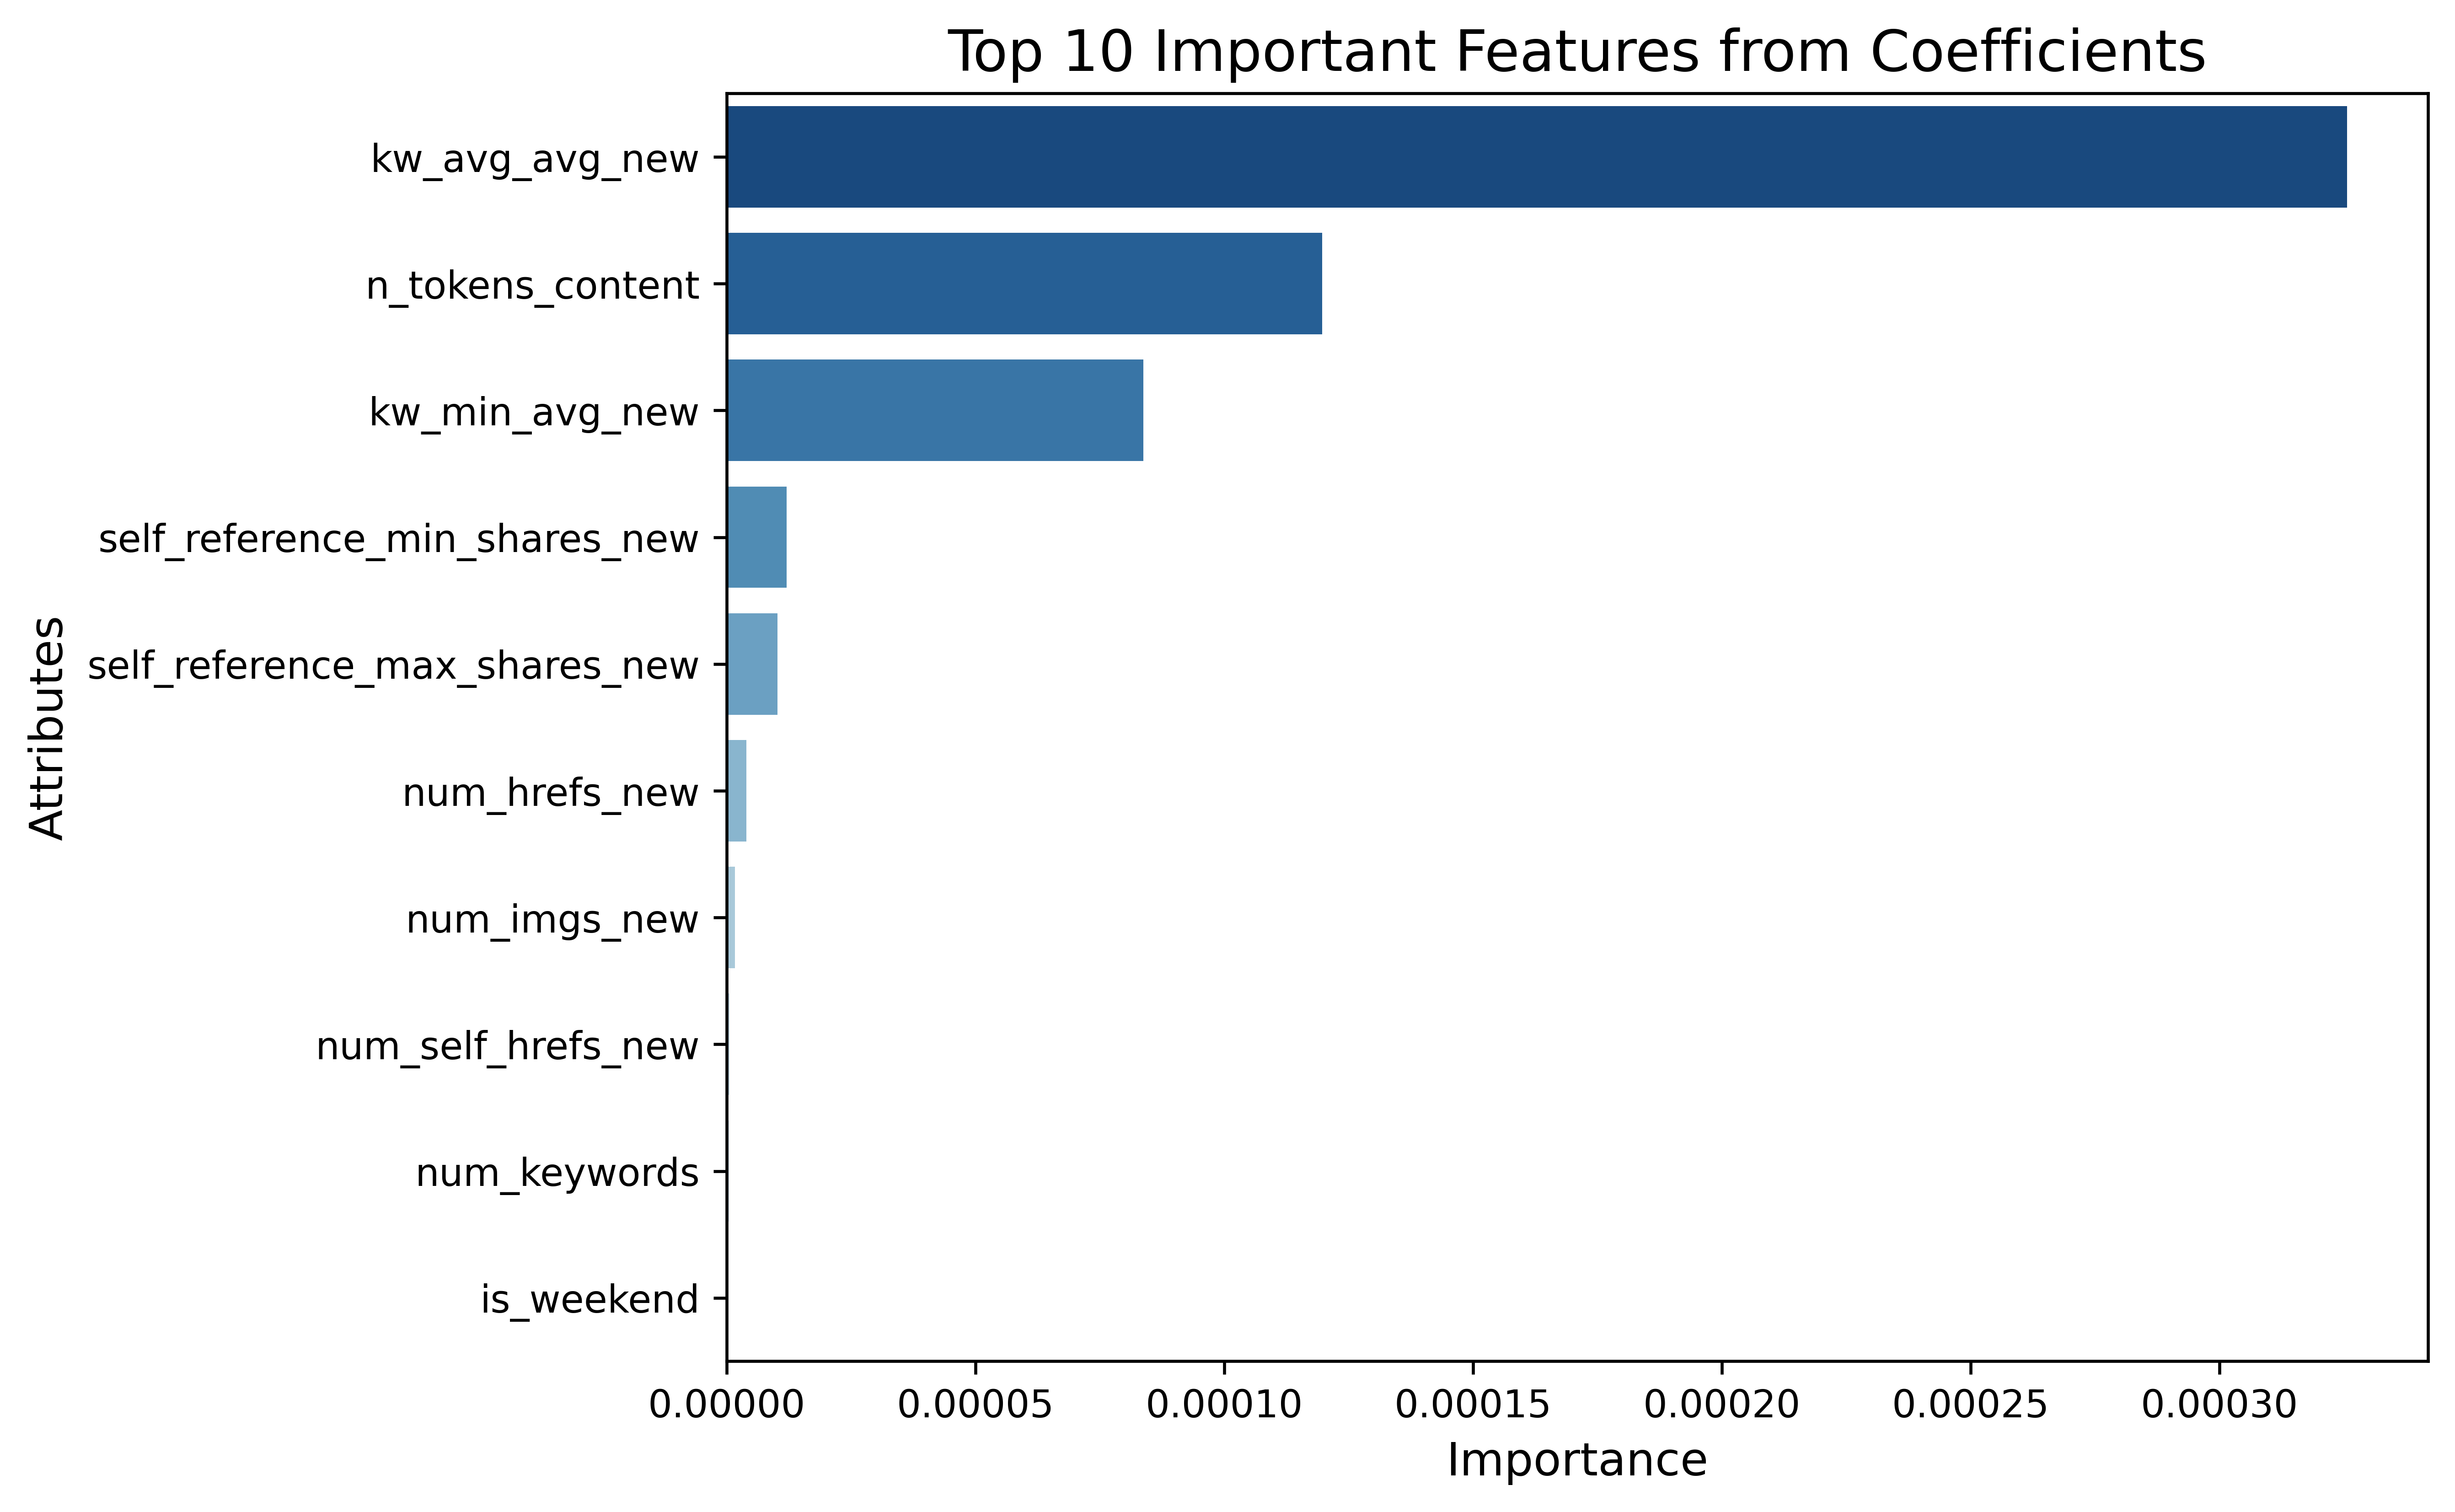

In [99]:
# plot top 10 feature importance
imp_top10 = importances[:10].reset_index()

plt.figure(figsize=(8, 6), dpi=600)
sns.barplot(x="Importance", y="Attribute", data=imp_top10, palette="Blues_r")
plt.title("Top 10 Important Features from Coefficients", size=15)
plt.xlabel("Importance", size=12)
plt.xticks(size=10)
plt.ylabel("Attributes", size=12)
plt.yticks(size=10)
plt.show()